<a href="https://colab.research.google.com/github/akifkashif/Netflix-Movies-and-TV-shows-Clustering-Project/blob/main/Copy_of_Capstone_of_Final_Netflix_Movies_and_TVShows_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -Akifuddin Kashif**
##### **Team Member 2 -Zeeshan Ahmed**

# **Project Summary -**

Netflix is an online platform consisting of streaming services for
entertainment purposes. It is a subscription based service with a wide
range of content. Most of its content is divided among two types namely
Movies and TVShows. Now in recent years it's the most popular OTT
platform for people all around the world. However, customers can cancel
their subscriptions at any time. Therefore, the company must keep the
users hooked on the platform and not lose their interest. This is where
recommendation systems start to play an important role, providing valuable
suggestions to users is essential.

Adding to it, Netflix is a media distribution company. It started with DVD distribution via mail, but has evolved susbstantially over the course of its existence. Today, Netflix is focused on streaming video. Some of its content is licensed, and some of content is produced in-house.

Netflix originally focused on Movies, but today television shows are probably more common format. Netflix works on a susbcription model, where users get unlimited access to content with a paid subscription


In this project we’ll be working with Netflix data to interpret the latest
trends and gain insights on the content listed, the dataset is collected from
Flixable which is a third-party Netflix search engine. In 2018, they released
an interesting report which shows that the number of TV shows on Netflix
has nearly tripled since 2010. The streaming service’s number of movies
has decreased by more than 2,000 titles since 2010, while its number of TV
shows has nearly tripled, it was about time that a recommended system
was created. To deliver it, we are going to analyze the data and Cluster
similar content by matching text-based features by building a
recommendation system.

We perfomed the following steps in the project:
1. Extracting the head and tail to get an idea of the dataset
2. Extracting the description of the dataset to get the mean, min, max
values and data types of the columns
3. Extracting the info of the data to show the non-null count of the
column values
4. Getting number of unique values for each column
5. Extracting the shape of the i.e, number of rows and columns
6. Checked for null values and there are null values in director, cast,
country, release year, rating columns.
7. Treated the null values in the column country by filling it by mode,
treated the null values in the cast column by replacing the null values
with ‘No Cast’
8. Plotting relevant graphs to extract information from them.

Then we perfomed text pre-processing for NLP: 
A) Tokenization:
Involves breaking of natural language text into chunks of information
that can be considered as discrete elements. The token occurrences in a
document can be used directly as a vector representing that document.

B) Punctuation Removal:
All the punctuations from the text are removed.

C) Stopword Removal:
Common words that add very little or no significant insight to the text
being processed are removed beforehand. This reduces time and
computational complexity.

D) Stemming Words:
Stemming is the process of reducing inflected words to their word
stem, base or root form—generally a written word form. This reduces
different forms of the same word carrying the same base meaning. It
should be noted that stemming does not remove synonyms.

Then we implemented clustering models like:

1. K-means Clustering

2. Agglomerative Clustering

Here in K-means we need to input the number of clusters for the algorithm to cluster so we implemented Elbow method, Silhouette Score and Dendogram to find out the number of clusters.

The best performing algorithm was K-means

We built a recommendation system by taking the clusters formed from K-means clustering which gave out ideal recommnedations for an input from the features.

In the end we successfully performed EDA and produced crucial conclusions to solve relevant business problems and the models performed really well given the irrelevance in the data and the size of the data




# **GitHub Link -**

#https://github.com/akifkashif/Netflix-Movies-and-TV-shows-Clustering-Project

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing important libariers
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, KFold

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# head of data
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# tail of data
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# getting info from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# getting duplicates
Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates

The Dublicate Values in Dataframe: 


Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

##### There are no duplicates in our dataset

#### Missing Values/Null Values

In [ ]:
# finding the sum of null values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#####There are null/missing values in director, cast, country, date_added, rating columns.

### What did you know about your dataset?

We got to know that there are many text based features in the dataset which are to be coupled and clustered together. These Clusters can be used as input for Recommended system of any sorts. The dataset doesn't contain any duplicates and has null values in the columns director,, cast, country, date_added, rating columns. We can use appropriate techniques to treat the missing values. The dataset contains 12 columns and 7787 rows. Most of the datatypes of the columns are of string type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# getting description of the data
df.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# getting number of unique values for each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***



### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1

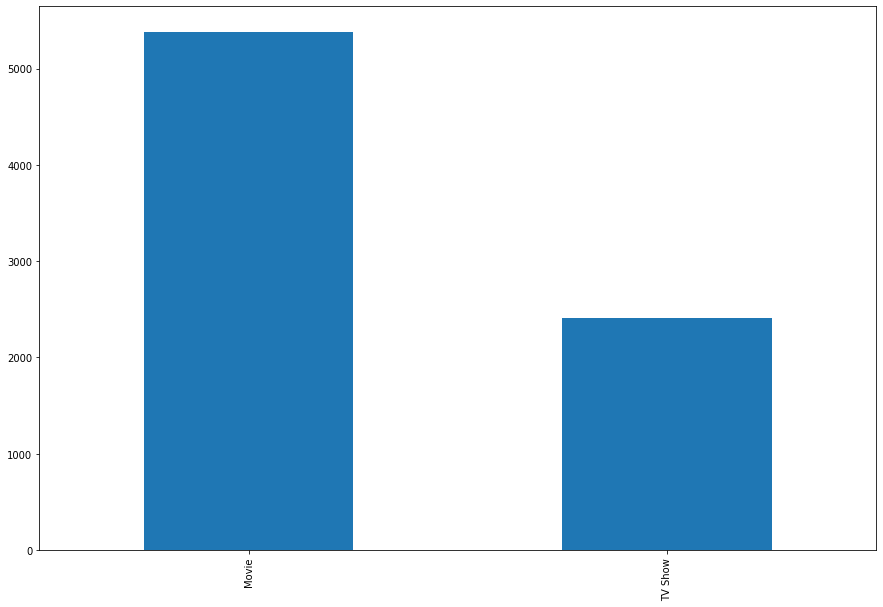

In [ ]:
plt.figure(figsize=(15, 10))
df['type'].value_counts().plot(kind='bar')


#### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish  values effectively

#### 2. What is/are the insight(s) found from the chart?

#####There are more number of movies in Netflix than TVshows.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The content on netflix is not evenly distributed with Movies being greater in numbers. Movies generally generate more revenue than TVshows so its a positive business impact.

# TAKE THIS PART AND PUT IT IN RELEVANT DROPBOX

In [ ]:
df['title'].nunique()

7787

In [ ]:
# making a copy of our dataframe
df2 = df.copy() 

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode().values[0])

In [ ]:
df['cast'].fillna(value='No cast',inplace=True)

In [ ]:
df['cast'].fillna(value='No cast',inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
df.dropna(subset=['date_added','rating'],inplace=True)

## Chart - 2

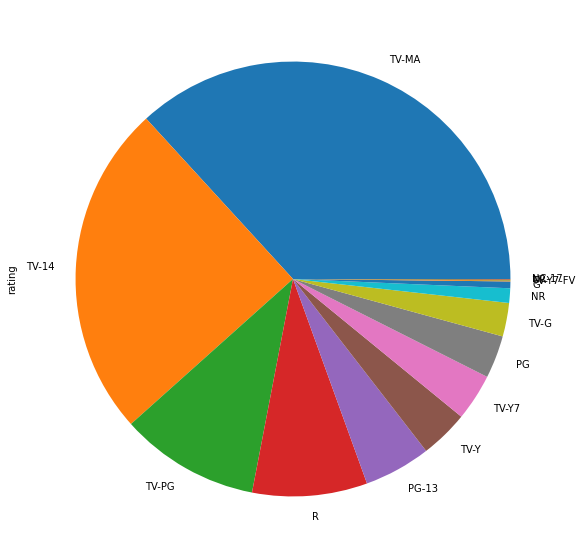

In [ ]:
# getting plot of rating
df['rating'].value_counts().plot(kind='pie', figsize = (10,10))

#### 1. Why did you pick the specific chart?

Piechart is a chart from matplolib library which is really helpful in representing the values occupied by certain values in a variable

#### 2. What is/are the insight(s) found from the chart?

#####Highest number of ratings are TV-MA and TV-14 from Movie and TV Show.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The content on Netflix is mostly of ratings Mature Audience and 14+. This is beneficial because most of the audience on this platform are adults so more people will be interested.

## Chart - 3

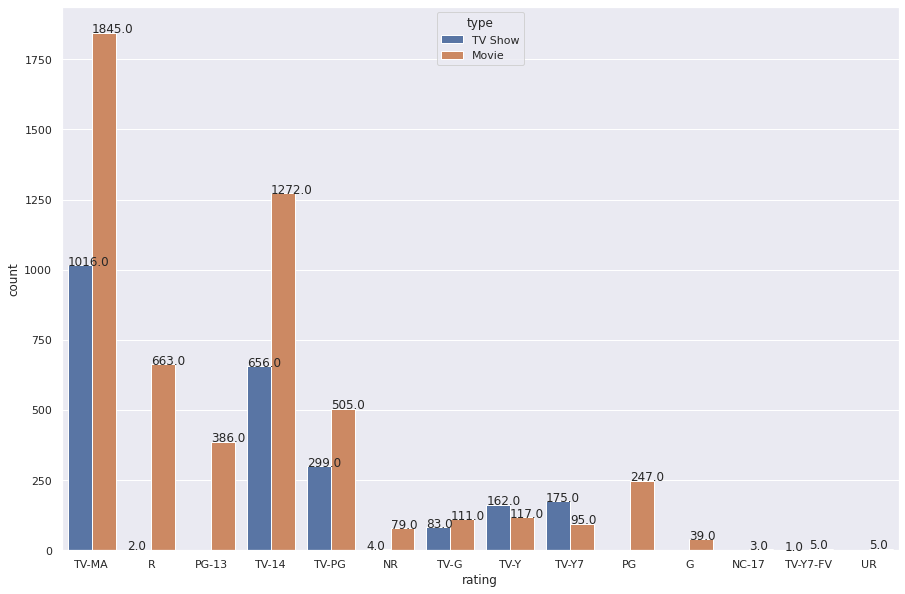

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(data = df, x = 'rating', hue = 'type',)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

##### There are more TV-MA(Mature Audience) content on Netflix followed by TV-14(14+) and TV-PG(Parental Guidance) compared to other content . There are no TV shows with content based on PG-13, PG, G, UR etc,. These TV Show stats might change in the future where more versatile content will be filmed.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the customers for Netflix are from US and India so the content is more appealing to the major audience on this Platform so the services by Netflix are appropriate with certain ratings.

## Chart - 4

# **HYPOTHESIS** : Most of the content made on Netflix is for Gen Z.

**NULL HYPOTHESIS** : No, most of the content made on Netflix is not for Gen Z.

**ALTERNATE HYPOTHESIS** : Yes, most of the content on Netflix is for Gen Z.

In [ ]:
df['Audience_AgeGroup']  = df['rating'].apply(lambda x:'Millennials' if x in ['TV-MA','NR','R','UR','NC-17'] else 'GenZ' if x in ['TV-PG','TV-Y7-FV', 'TV-Y7', 'PG','TV-14','PG' ]  else 'Kids')

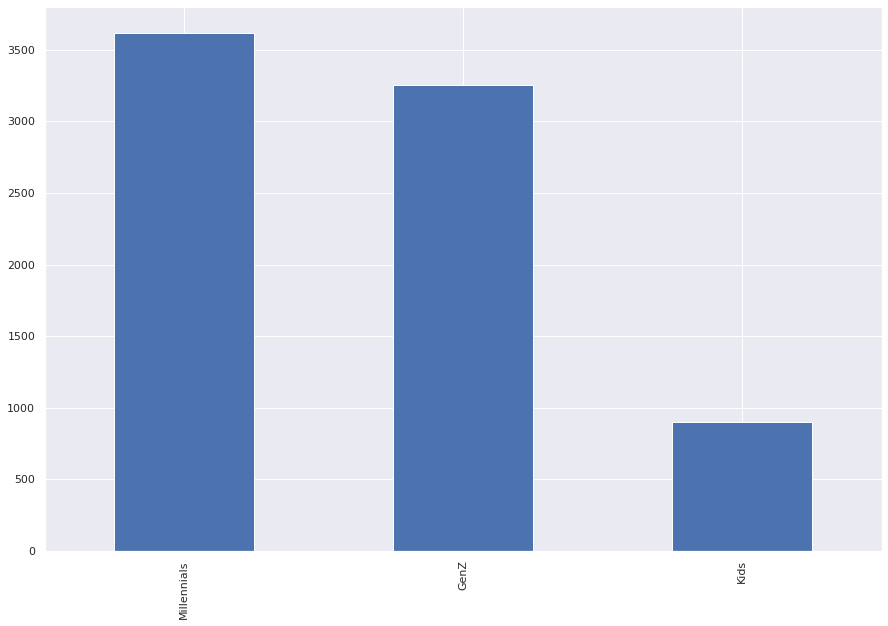

In [ ]:
df['Audience_AgeGroup'].value_counts().plot(kind='bar')

#### 1. Why did you pick the specific chart?



BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish values effectively

#### 2. What is/are the insight(s) found from the chart?

The content on Netflix is majorly for Millenials and GenZ and not for kids.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The large part of Netflix users are Millenials and GenZ so we can say that the content is appropriate and more people will be hooked to it.

## Chart - 5

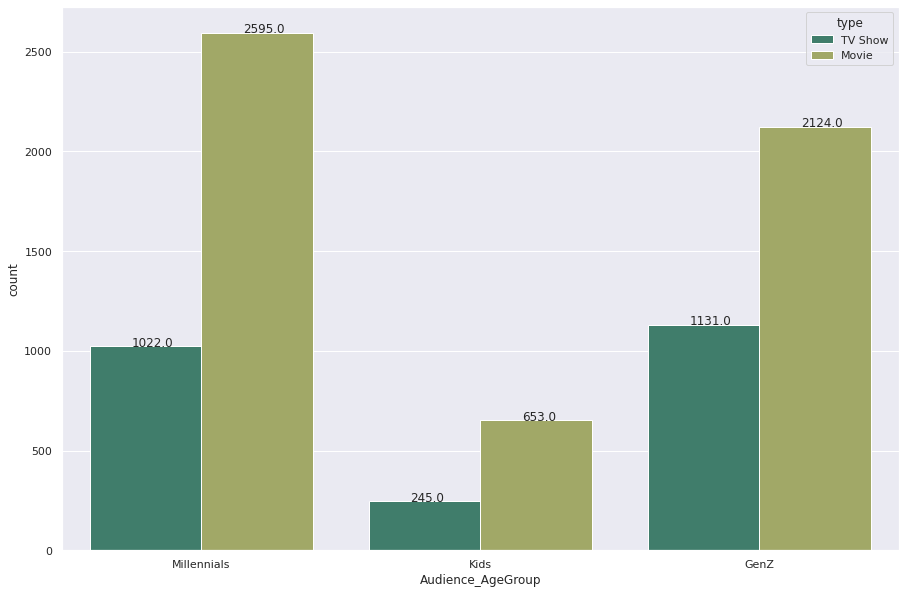

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(data = df, x = 'Audience_AgeGroup', hue = 'type',palette = 'gist_earth')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

##### Netflix has highest content count for individuals of age group Millennials and lowest content for Kids. The database contains wide-reaching number of movies for Millenials and fairly equivalent number of TV Shows for both Millennial and GenZ age groups.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the overall content on Netflix is greater for movies than TVShows, the content assigned to each group higher for movies section

## Chart - 6

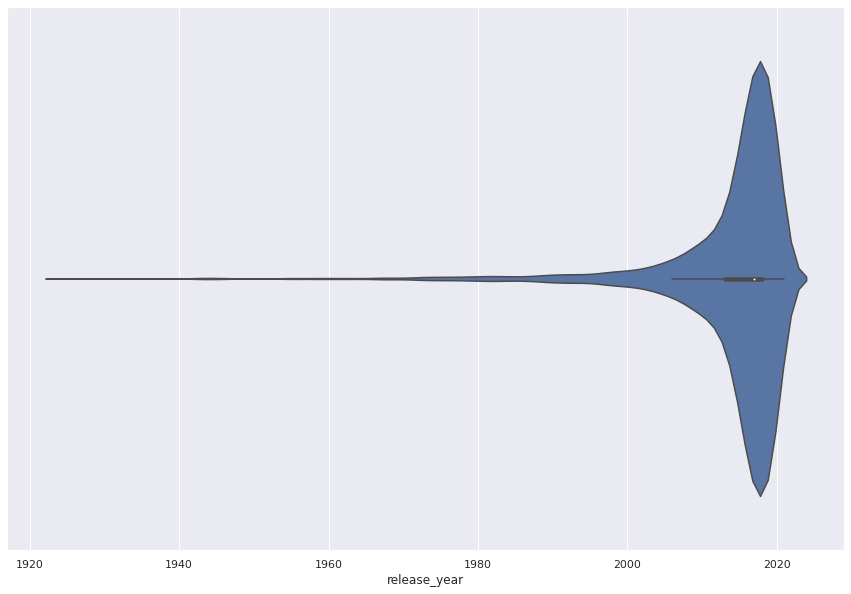

In [ ]:
# getting a violinplot for release year
sns.violinplot(data = df, x = 'release_year', hue = 'type')

#### 1. Why did you pick the specific chart?

Violin plots are similar to box plots, except that they also show the probability density of the data at different values

#### 2. What is/are the insight(s) found from the chart?



#####1.   Highest Number of movies and TV shows were produced in the years   2015-2019. 

#####2.   Because of the digitization of the world, people are just one click away from streaming content so majority of the audience in these periods were more interested in Netflix so producers preferred to release their content on netflix. 

##### 3.   People started taking interest in OTT platforms from 2017 and as Netflix is the largest OTT service provider so theres a peak from that period.



#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the year 2015, people across the world had started using smartphone technology and wanted some form of entertainment and Netflix provided just that. They release the platform at just the right time and since then people are hooked to Netflix

## Chart - 7

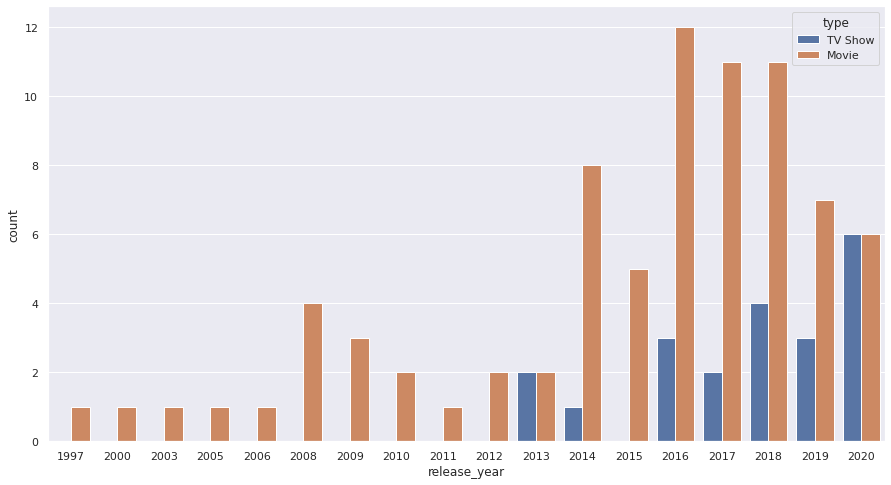

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data = df, x = df['release_year'][:100:], hue = 'type')

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

#####As we can see there weren't any TvShows until 2012. Then we can see that there is a steady increase in the TvShow content on Netflix. Now the TVShows are neck to neck with Movies which shows Netflix has been increasingly focusing on TV shows rather than movies in recent years.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that frequency of rise of content is greater for TVShow when compared to the content increase of Movies. This shows the TVShows is more watched by users than movies. As the duration of TVShows is longer than movies, we can say the users are gonna be around more now than ever.

## Chart - 8

In [ ]:
df.country.value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

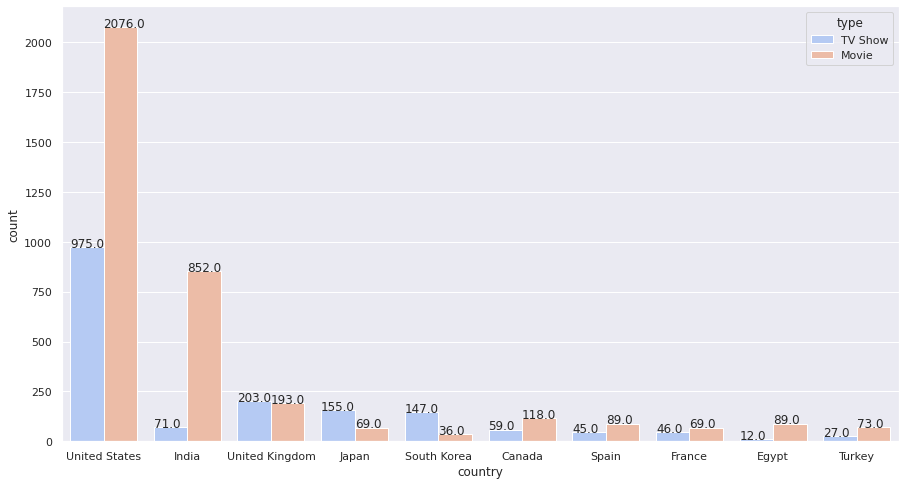

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.countplot(data = df, x='country',palette="coolwarm",order=df['country'].value_counts().index[0:10],hue='type', )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

#####This countplot shows that the country US has significant amount of both movies and TV shows at netflix and coming at second place, India has an inconsistent distribution between movie and TV show with movies being higher.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the content is produced in countries US and India and movies produce more revenue so it's beneficial.

## Chart - 9

In [ ]:
#Extracting month from date added column in the dataset
df['month'] = pd.DatetimeIndex(df['date_added']).month


In [ ]:
#COnverting month number to month name
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description Audience_AgeGroup month  
0  In a future where the elite inhabit an island ...       Millennials   Aug  
1  After a devastating earthquake hits Mexico Cit...       Millennials   Dec  
2  When an army recruit is found dead, his fellow...       Millennials   Dec  
3  In a postapocalyptic world, rag-doll robots hi...              Kids   Nov  
4  A brilliant group of students become card-coun...              Kids   Jan

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


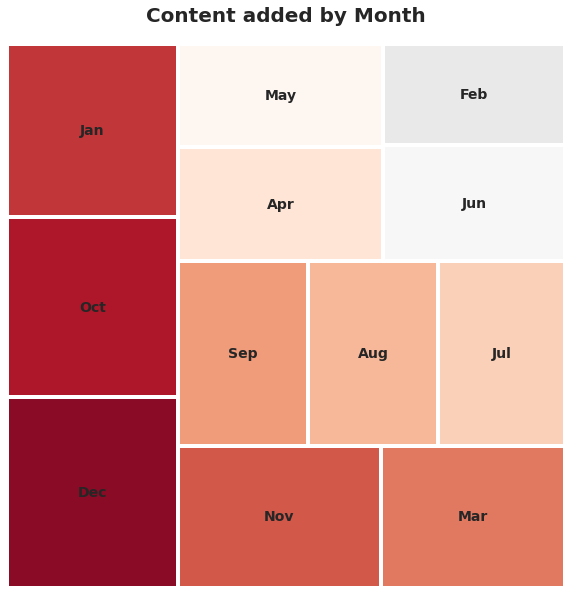

In [ ]:
# Making a TreeMap
import squarify
y = df.month.value_counts()
fig = plt.figure(figsize = (10,10))
squarify.plot(sizes = y.values , label = y.index , color = sns.color_palette('RdGy' , n_colors = 20),
             linewidth = 4 , text_kwargs = {'fontsize' : 14 , 'fontweight' : 'bold'})
plt.title('Content added by Month' , position = (0.5 , 1.0 + 0.03) , fontsize = '20' , fontweight = 'bold')
plt.axis('off')
plt.show()

#### 1. Why did you pick the specific chart?

Squarify is used to plot huge data and to plot the proportions between each part and the whole by providing the label to them.

#### 2. What is/are the insight(s) found from the chart?

#####December was the month were the most amount of content was added on Netflix followed by October.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

December is where most families celebrate Christmas so more people consume content during this month.

#***Research says that the average duration of a single episode of Netflix is 55 minutes and the average number of episodes in a single season of a TV-show is 10.***

In [ ]:
def min_check(x):
  if ('Seasons' in x) | ('Season' in x):
    y = int(x[0])*550
    y = str(y) +' ' + 'min'
    return y
  else:
    return x

In [ ]:
def interger_min(x):
  if 'min' in str(x):
    y = x.replace(' min', '')
    y = int(y)
    return y
  else:
    return x
     

In [ ]:
df1['duration_in_min2'] = df1['duration'].apply(lambda x: min_check(x))

In [ ]:
df1['duration_in_min'] = df1['duration_in_min2'].apply(lambda x: interger_min(x))

In [ ]:
df1.drop(columns = (['duration','duration_in_min2']), inplace =  True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            7770 non-null   object
 1   type               7770 non-null   object
 2   title              7770 non-null   object
 3   director           5394 non-null   object
 4   cast               7770 non-null   object
 5   country            7770 non-null   object
 6   date_added         7770 non-null   object
 7   release_year       7770 non-null   int64 
 8   rating             7770 non-null   object
 9   listed_in          7770 non-null   object
 10  description        7770 non-null   object
 11  Audience_AgeGroup  7770 non-null   object
 12  month              7770 non-null   object
 13  duration_in_min    7770 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 1.1+ MB


## Chart - 10

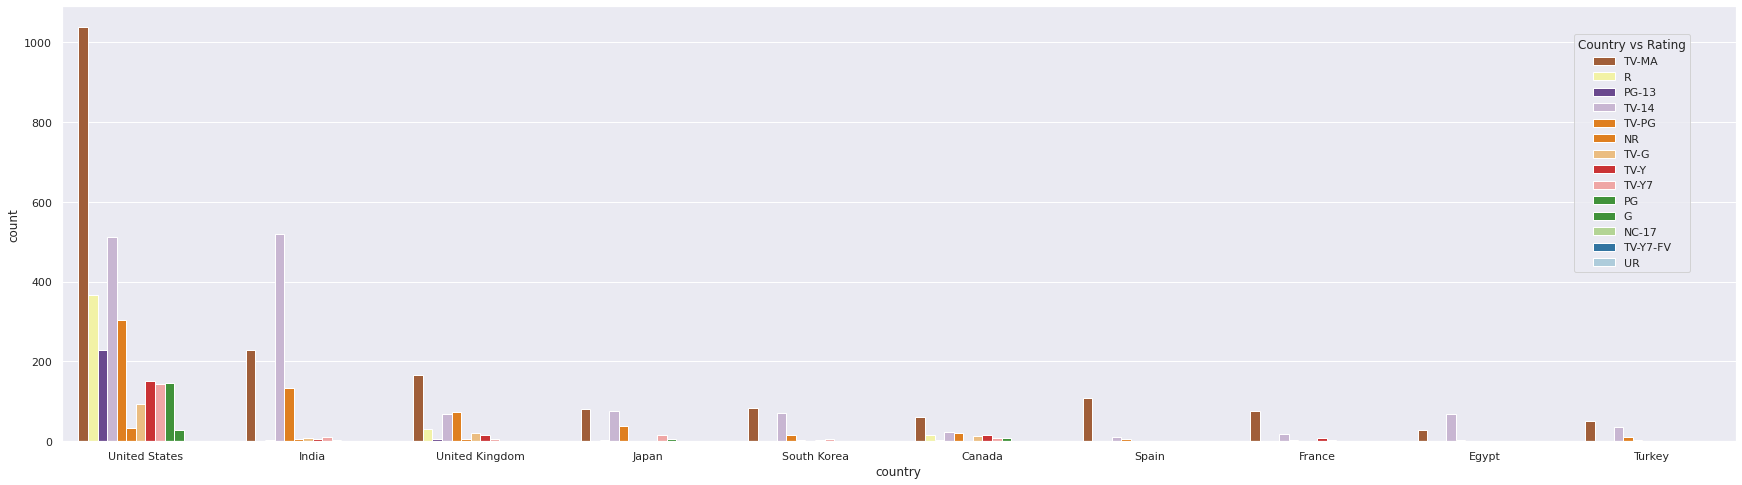

In [ ]:

sns.set(rc={'figure.figsize':(30,8)})
g = sns.countplot(data = df, x='country',palette="Paired_r",order=df['country'].value_counts().index[0:10],hue = 'rating', )
sns.move_legend(g, "upper left", bbox_to_anchor=(.90, .95), title='Country vs Rating')

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?



#####Here we can see the distribution of content is highest in US reason being there are a myriad of cultures thats why US produces variety of content on Netflix. As the total content count of a country decreases, the range of content cease to exist.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are a large number of content on Netflix with a wide range of ratings. This is benneficial because there are a large number of cultures in US.

## Chart - 11

In [ ]:
df2.dropna(subset =(['director']), inplace =  True )

Text(0.5, 1.0, 'Ratings with respect to Directors')

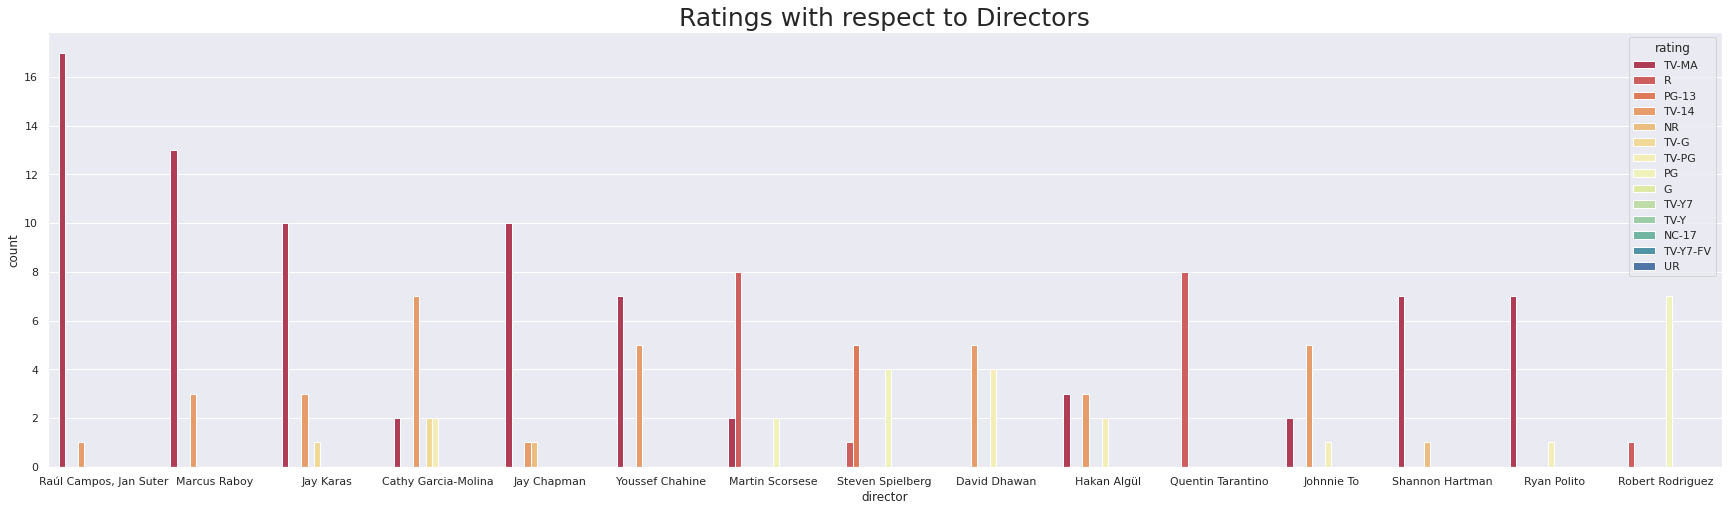

In [ ]:
# getting directors plot with rating
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.countplot(data = df2, x='director',palette="Spectral",order=df['director'].value_counts().index[0:15],hue='rating')
plt.title('Ratings with respect to Directors',fontsize = 25  )

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

***Majority of directors had their content rated as TV-MA(Mature Audience). As directors specialize in specific type of content, there aren't many directors who produce Movies or TV Shows with multiple ratings. ***

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



This insight shows that the most famous directors are the ones who produced the most content on Netflix so users have so much quality content in their hands.

## Chart - 12

[Text(0, 0, 'David Attenborough'),
 Text(0, 0, 'Samuel West'),
 Text(0, 0, 'Jeff Dunham'),
 Text(0, 0, 'Kevin Hart'),
 Text(0, 0, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath'),
 Text(0, 0, 'Craig Sechler'),
 Text(0, 0, 'Iliza Shlesinger'),
 Text(0, 0, 'Bill Burr'),
 Text(0, 0, 'Jim Gaffigan'),
 Text(0, 0, 'Jay O. Sanders'),
 Text(0, 0, 'Vir Das'),
 Text(0, 0, 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep'),
 Text(0, 0, 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal'),
 Text(0, 0, 'Jim Jefferies'),
 Text(0, 0, 'Tom Segura')]

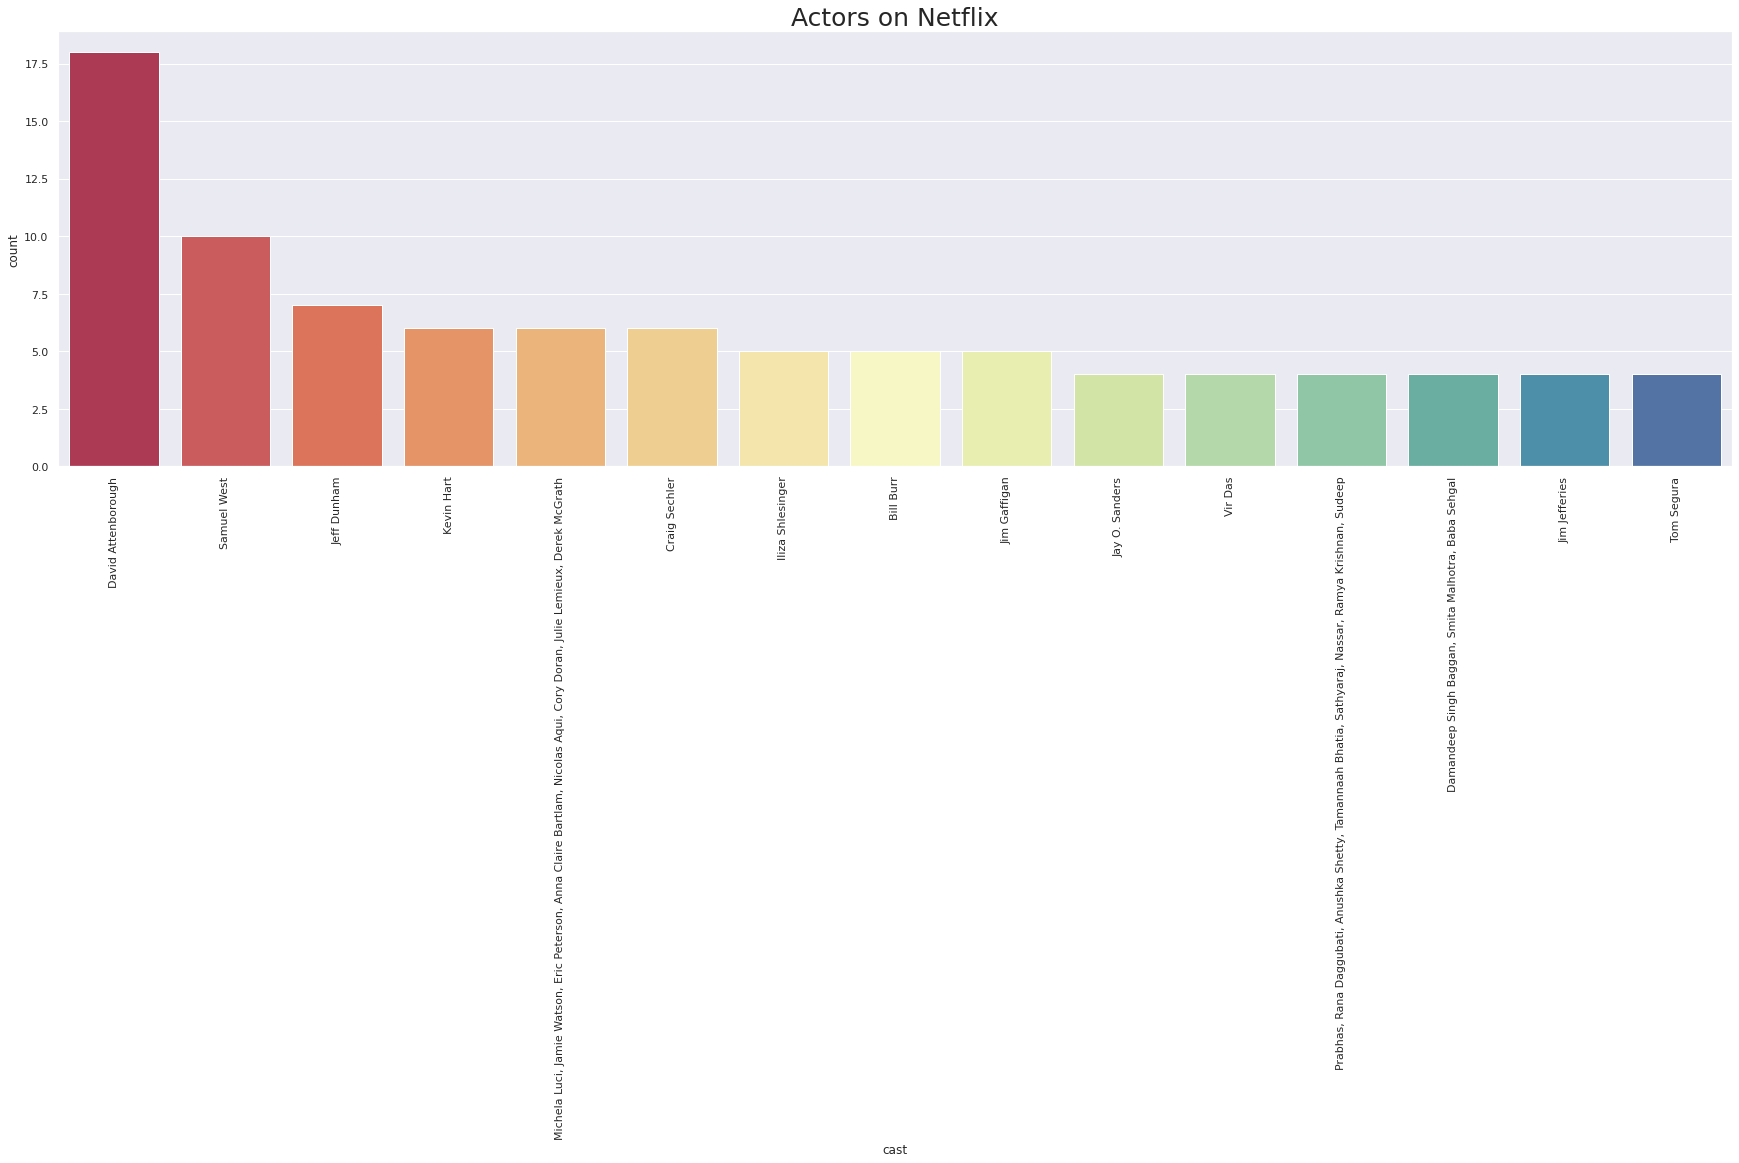

In [ ]:
# getting actors plot
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.countplot(data = df2, x='cast',palette="Spectral",order=df['cast'].value_counts().index[0:15])
plt.title('Actors on Netflix',fontsize = 25  )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

##### As it can be seen from the plot David Attenborough , Samuel West , Jeff Dunham and Kevin Hart are leading the charts when it comes content rate on Netflix.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight shows that the most famous actors are the ones who acted the most content on Netflix so users have so much quality content in their hands.

## Chart - 13

In [ ]:
df_duration = df1.groupby('type').count()['duration_in_min']

In [ ]:
df_duration

type
Movie      5372
TV Show    2398
Name: duration_in_min, dtype: int64

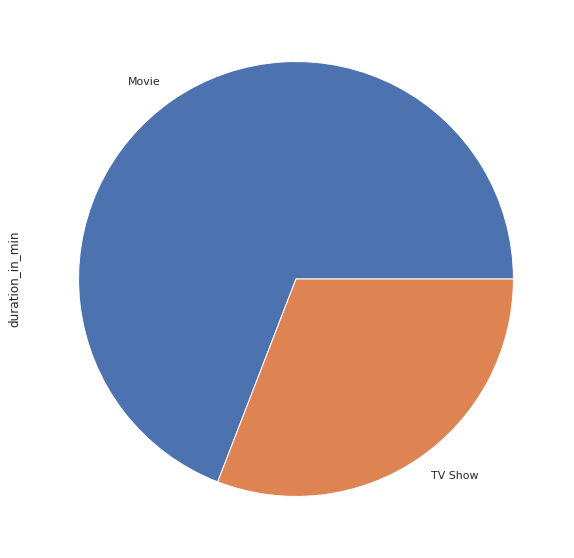

In [ ]:
# getting duration plot
df_duration.plot(kind='pie', figsize = (10,10))

#### 1. Why did you pick the specific chart?

Piechart is a chart from matplolib library which is really helpful in representing the values occupied by certain values in a variable

#### 2. What is/are the insight(s) found from the chart?

#####The duration of content on Movie is signficantly higher than that of TV Show.  

#####Most of the content on Netflix has a duration of 550 minutes followed by a duration of 1100 minutes.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The duration is proportional to the period the users stay loyal to Netflix. The average duration is about 800 mins and its higher.

## Chart - 14

In [ ]:
# getting duration of Tv shows and Movies plot
tv_shows = df1[df1['type'] == 'TV Show']
movies = df1[df1['type'] == 'Movie']

In [ ]:
duration_tv_shows = tv_shows['duration_in_min'].reset_index()
duration_movies = movies['duration_in_min'].reset_index()

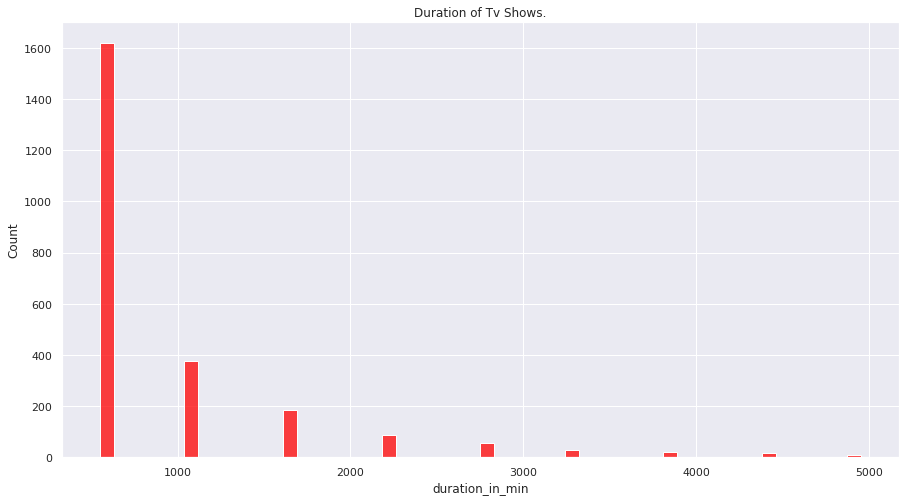

In [ ]:
# getting duration of Tv shows
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration_in_min'], color= 'Red')
plt.title('Duration of Tv Shows.')
plt.show()
     

#### 1. Why did you pick the specific chart?

Histplot is a plot from seaborn library which really helps getting the distribution of values of a variable

#### 2. What is/are the insight(s) found from the chart?

***Most of the TV Show content duration is around 500 followed by 1000 minutes. 550 minutes comprise of single season and two seasons in 1000 minutes. Most of Shows may have been stopped producing halfway due to lack of finanicial resources and viewers.***

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The duration is proportional to the period the users stay loyal to Netflix. The average duration is about 800 mins and its higher.

## Chart - 15

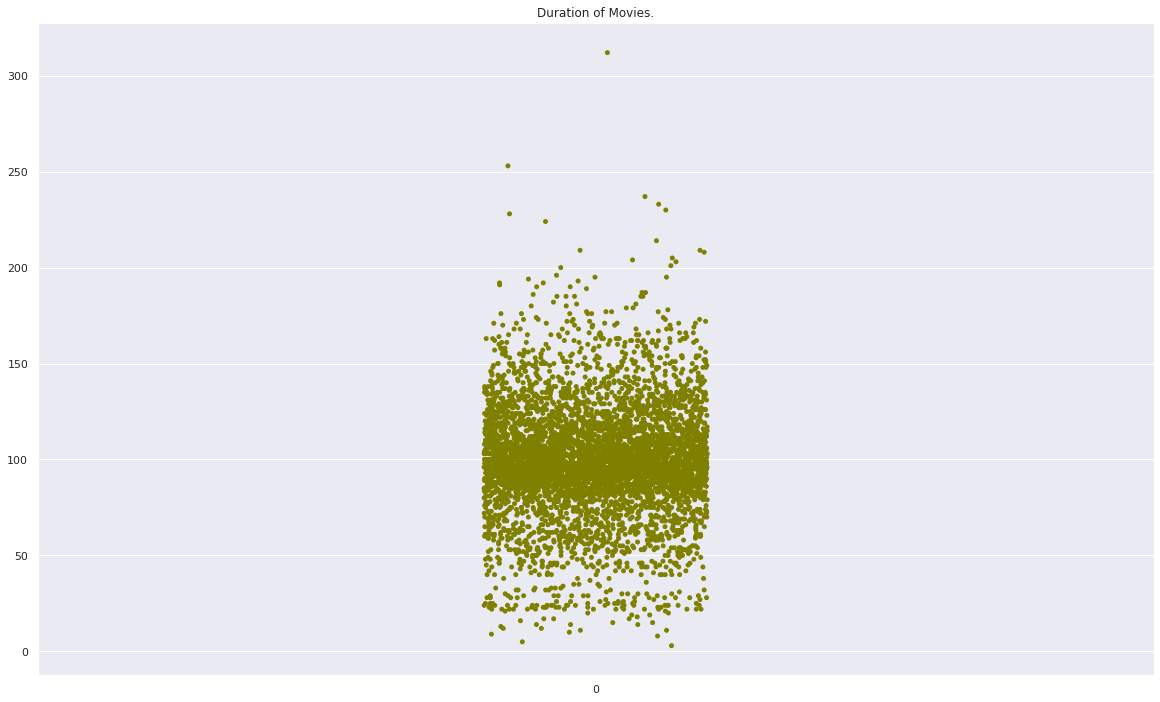

In [ ]:
# getting duration of Movies
plt.figure(figsize=(20,12))
sns.set(style="darkgrid")
sns.stripplot(data=duration_movies['duration_in_min'], color='Olive')
plt.title('Duration of Movies.')
plt.show()

#### 1. Why did you pick the specific chart?

It is a good complement to a boxplot or violinplot in cases where all observations are shown along with some representation of the underlying distribution. It is used to draw a scatter plot based on the category. Parameters: x, y, hue: Inputs for plotting long-form data.

#### 2. What is/are the insight(s) found from the chart?

##### As we can see most of movies are around 100 to 120 minute mark which accounts to around 2hrs.Directors prefer to tell the story in 2hrs because it is the ideal period of time to get into crucial details and not dive too much into intricacies. Most of the people find it tiring if its a long movie.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The duration is proportional to the period the users stay loyal to Netflix. The average duration is about 120 mins for movies and its higher.

## Chart - 16

In [ ]:
# getting all the unique genres form the dataset
genres = ",".join(df1['listed_in']).split(",")

In [ ]:
len(set(genres))

73

***There are 73 unique genres on Netflix with multiple combinations for a content.***

In [ ]:
from collections import Counter
genres = Counter(genres)
type(genres)

collections.Counter

In [ ]:
genres = sorted(dict(genres).items(), key=lambda x: x[1])

In [ ]:

type(genres)

list

In [ ]:
for i in genres:
  y = i[0]
  print(y)

Sports Movies
TV Sci-Fi & Fantasy
LGBTQ Movies
Spanish-Language TV Shows
Romantic Movies
 Classic & Cult TV
 Stand-Up Comedy
TV Horror
Sci-Fi & Fantasy
TV Shows
Cult Movies
Music & Musicals
Anime Features
 Stand-Up Comedy & Talk Shows
Classic & Cult TV
Independent Movies
 Classic Movies
Romantic TV Shows
 Children & Family Movies
Stand-Up Comedy & Talk Shows
 Documentaries
TV Action & Adventure
 Anime Features
 Cult Movies
Thrillers
 TV Thrillers
Movies
 Kids' TV
 Faith & Spirituality
 Crime TV Shows
 TV Horror
 Teen TV Shows
TV Dramas
 Horror Movies
 TV Sci-Fi & Fantasy
Classic Movies
 Science & Nature TV
 LGBTQ Movies
 TV Mysteries
Reality TV
TV Comedies
 TV Action & Adventure
International Movies
 Reality TV
 Spanish-Language TV Shows
Anime Series
 Korean TV Shows
 Docuseries
Docuseries
 Sports Movies
 Sci-Fi & Fantasy
British TV Shows
Horror Movies
 Music & Musicals
 Romantic TV Shows
Stand-Up Comedy
Kids' TV
Crime TV Shows
 Comedies
 TV Comedies
 Thrillers
Children & Family Movies

In [ ]:
names = []
values = []
for i in genres:
  names.append(i[0])
  values.append(i[1])

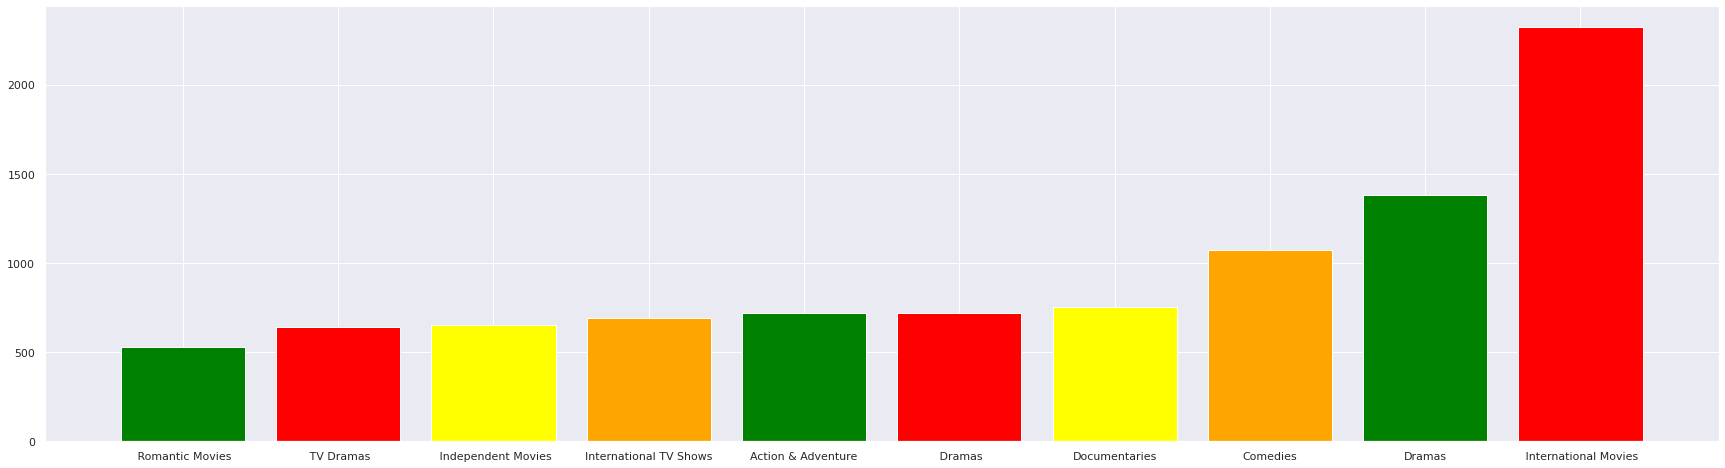

In [ ]:
color=['green','red', 'yellow', 'orange']
plt.bar(names[-10:],values[-10:], color = color)
plt.show()

#### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish  values effectively

#### 2. What is/are the insight(s) found from the chart?

#####International Movies is the most popular genre followed by Dramas on Netflix. The reason might be that the content was filmed outside of U.S or was filmed by third-party production studios.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most audience on Netflix are interest in International Movies so the content genre count is appropriate.

## Chart - 17

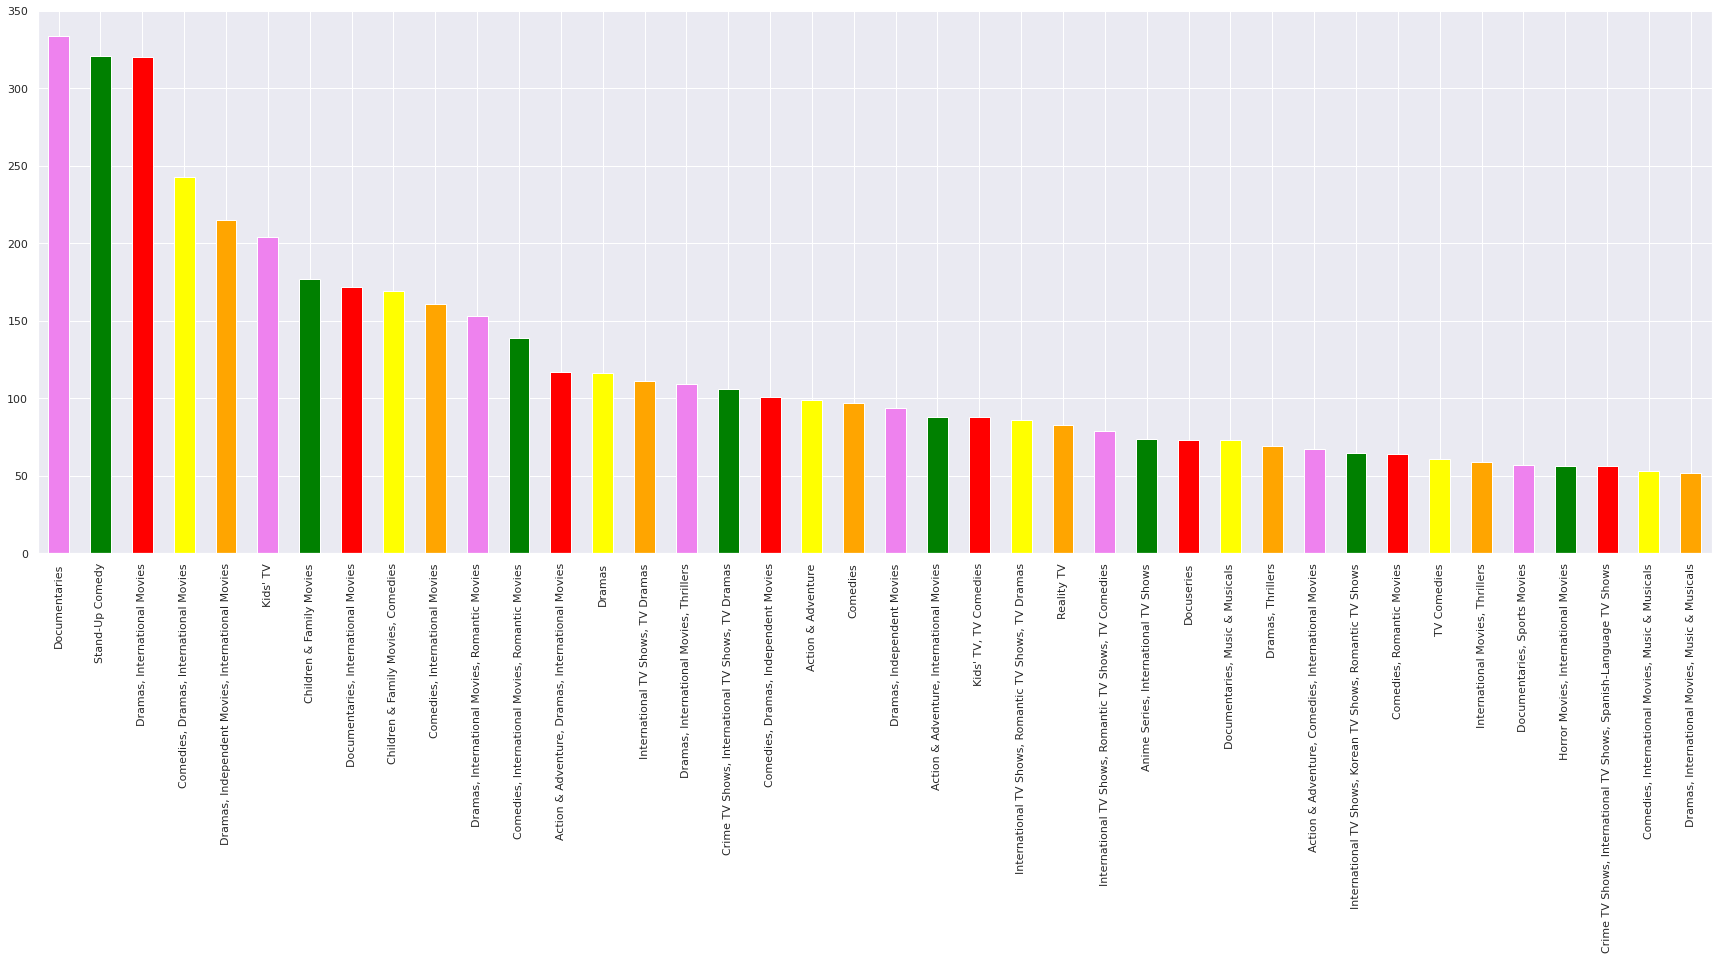

In [ ]:
color=[ 'violet', 'green', 'red', 'yellow', 'orange']
df1.listed_in.value_counts()[0:40].plot(kind = 'bar', figsize = (30,10),color=color)

#### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish  values effectively

#### 2. What is/are the insight(s) found from the chart?

##### Top 40 genres of content across Netflix. Media count for  Documentaries, Stand-Up Comedy, Dramas and International Movies was the highest. People are more inclined towards documentaries because it has knowledgeable content and its a fun way to learn and on the other hand Stand-Up Comedy is a form of stress buster for the general audience

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Documentaries are really good for knowledge and comedy content is for chilling so people will be hooked to it.

## Chart - 18- Correlation Heatmap

### The columns of the dataset are of string type so its not possible to plot a correlation heatmap.

## Chart - 15 - Pair Plot 

### The columns of the dataset are of string type so its not possible to plot a pair plot.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            7770 non-null   object
 1   type               7770 non-null   object
 2   title              7770 non-null   object
 3   director           5394 non-null   object
 4   cast               7770 non-null   object
 5   country            7770 non-null   object
 6   date_added         7770 non-null   object
 7   release_year       7770 non-null   int64 
 8   rating             7770 non-null   object
 9   duration           7770 non-null   object
 10  listed_in          7770 non-null   object
 11  description        7770 non-null   object
 12  Audience_AgeGroup  7770 non-null   object
 13  month              7770 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [ ]:
# df['country'] = df['country'].fillna(df['country'].mode().values[0])

In [ ]:
# df['cast'].fillna(value='No cast',inplace=True)

In [ ]:
# df.dropna(subset=['date_added','rating'],inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We replaced the null values of the column country with the mode i.e, the most reoccuring value of the column

The dropped the null of the columns date_added and rating because the null value count is less in number

We filled the null value of the column cast with no cast because there are movies with different cast count generally.

###  Handling Outliers

### There aren't any outliers in the dataset as the column datatypes are of string format.

###  Categorical Encoding

### There aren't any categorical columns in the dataset as the column datatypes are of string format.

###  Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

###  Feature Manipulation & Selection

####  Feature Manipulation

In [ ]:
df1.drop(columns = (['director']), inplace =  True)

####  Feature Selection

In [ ]:
data = df1[['title']]
data['Filtered_data'] = (df1['description'] + ' ' + df1['listed_in'] + ' '+ df1['cast'] + ' ' + df1['country'] + ' ' + df1['rating']).astype(str)
data.set_index('title', inplace = True)
data.head()

Filtered_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

##### What all feature selection methods have you used  and why?

We dropped the direcotr columns because 50% of the dataset contains null values.

##### What all features have you selected  and why?

We selected all the text based features that are crucial for Netflix as a content to filter based on these features.

###  Removing Punctuations

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
data['Filtered_data'] = data['Filtered_data'].apply(remove_punctuation)
data.head(10)

Filtered_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead his fellow ...
9      In a postapocalyptic world ragdoll robots hide...
21     A brilliant group of students become cardcount...
46     A genetics professor experiments with a treatm...
122    After an awful accident a couple admitted to a...
187    After one of his high school students attacks ...
706    When a doctor goes missing his psychiatrist wi...
1920   An architect and his wife move into a castle t...

###  Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
data['Filtered_data'] = data['Filtered_data'].apply(stopwords)
data.head(10)

Filtered_data
title                                                   
3%     future elite inhabit island paradise far crowd...
7:19   devastating earthquake hits mexico city trappe...
23:59  army recruit found dead fellow soldiers forced...
9      postapocalyptic world ragdoll robots hide fear...
21     brilliant group students become cardcounting e...
46     genetics professor experiments treatment comat...
122    awful accident couple admitted grisly hospital...
187    one high school students attacks dedicated tea...
706    doctor goes missing psychiatrist wife treats b...
1920   architect wife move castle slated become luxur...

###  Tokenization

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['Filtered_data'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_before_stem = vocab_bef_stem.sort_values(ascending=False)

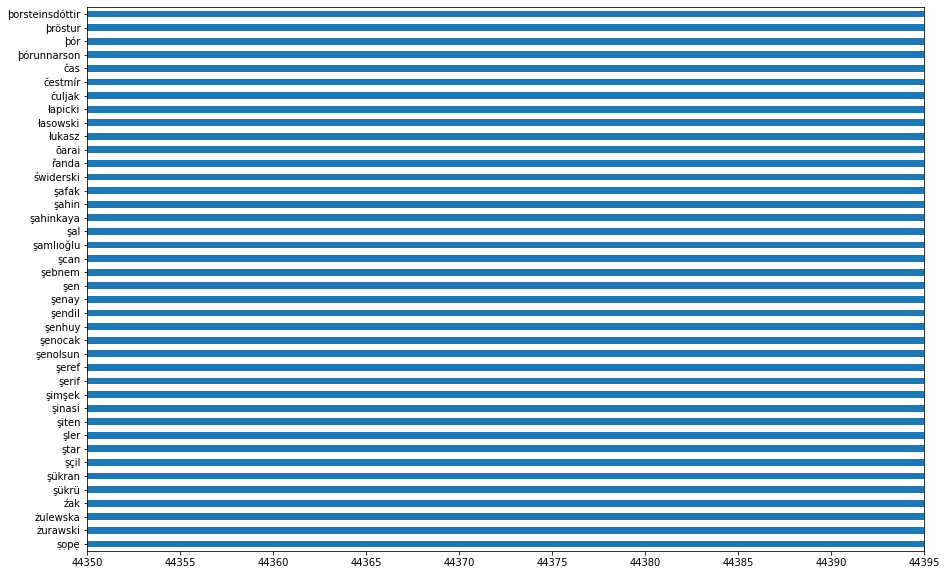

In [ ]:
top_vocab = vocab_before_stem.head(40)
top_vocab.plot(kind = 'barh', figsize = (15,10),xlim = (44350, 44395))

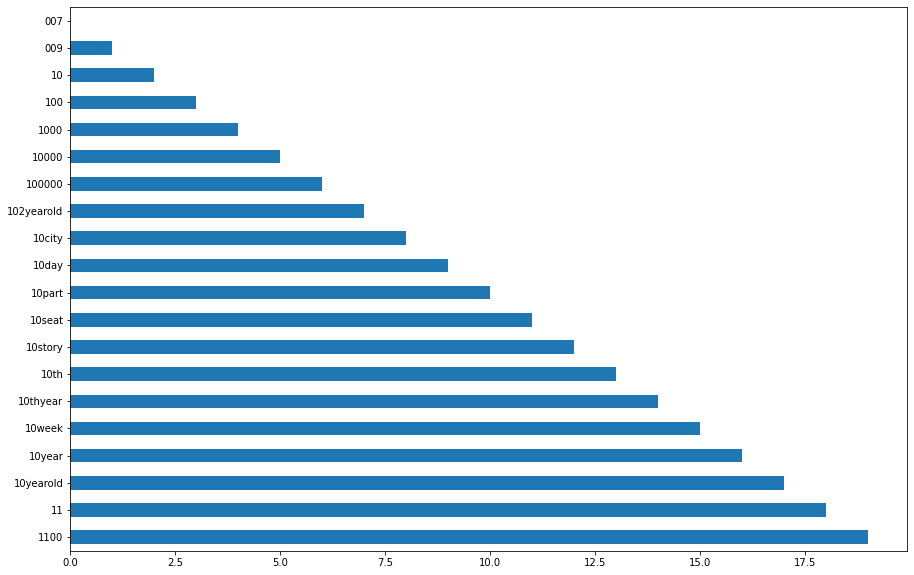

In [ ]:
top_vacab = vocab_before_stem.tail(20)
top_vacab.plot(kind = 'barh', figsize = (15,10),)

###  Text Normalization

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
data['Filtered_data'] = data['Filtered_data'].apply(stemming)
data.head(10)

Filtered_data
title                                                   
3%     futur elit inhabit island paradis far crowd sl...
7:19   devast earthquak hit mexico citi trap survivor...
23:59  armi recruit found dead fellow soldier forc co...
9      postapocalypt world ragdol robot hide fear dan...
21     brilliant group student becom cardcount expert...
46     genet professor experi treatment comatos siste...
122    aw accid coupl admit grisli hospit separ must ...
187    one high school student attack dedic teacher t...
706    doctor goe miss psychiatrist wife treat bizarr...
1920   architect wife move castl slate becom luxuri h...

##### Which text normalization technique have you used and why?

Snowball Stemmer: It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer.

###  Text Vectorization

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['Filtered_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

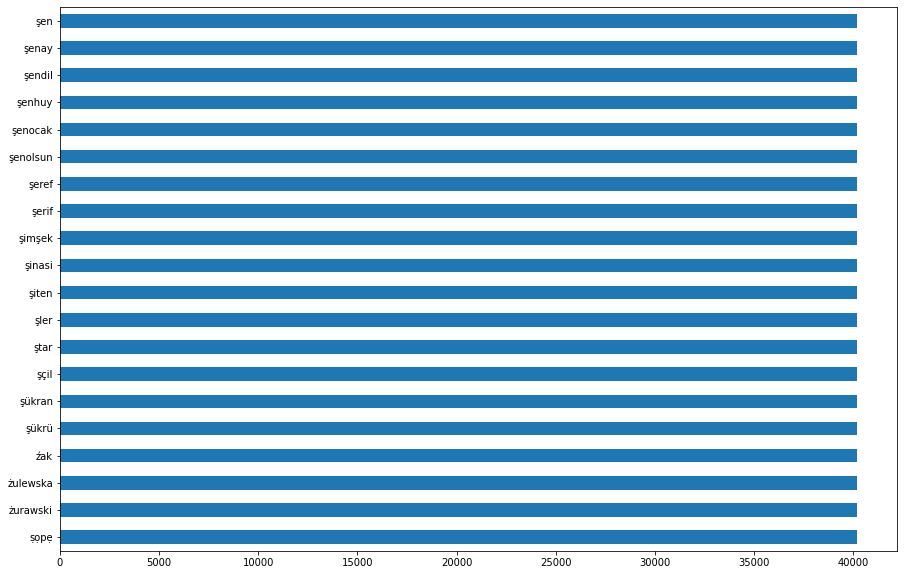

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(15,10))


##### Which text vectorization technique have you used and why?

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF). The term frequency is the number of occurrences of a specific term in a document.

###  Lower Casing

In [ ]:
data['Filtered_data']= data['Filtered_data'].apply(lambda x: x.lower())

### Length of the features

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
data['length_of_text'] = data['Filtered_data'].apply(length)
data.head()

Filtered_data  length_of_text
title                                                                   
3%     futur elit inhabit island paradis far crowd sl...             293
7:19   devast earthquak hit mexico citi trap survivor...             202
23:59  armi recruit found dead fellow soldier forc co...             237
9      postapocalypt world ragdol robot hide fear dan...             277
21     brilliant group student becom cardcount expert...             267

###  Data Transformation

In [ ]:
X =data.Filtered_data

In [ ]:
# Tranforming data
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(X)

In [ ]:
# shape of vectorized data
print(X.shape)

(7770, 20000)


###  Dimesionality Reduction

###Dimensionality Reduction using PCA

In [ ]:
#Reducing the componets of X values into 0.95 principal component axes for efficiency
from sklearn.decomposition import PCA
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape
     

(7770, 5570)

#### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is a machine learning (ML) or statistical technique of reducing the amount of random variables in a problem by obtaining a set of principal variables.

#### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used Principal Component Analysis as the technique for Dimensionality Reduction

## ***7. ML Model Implementation***

#Eblow Method for K-means

Text(0, 0.5, 'WCSS')

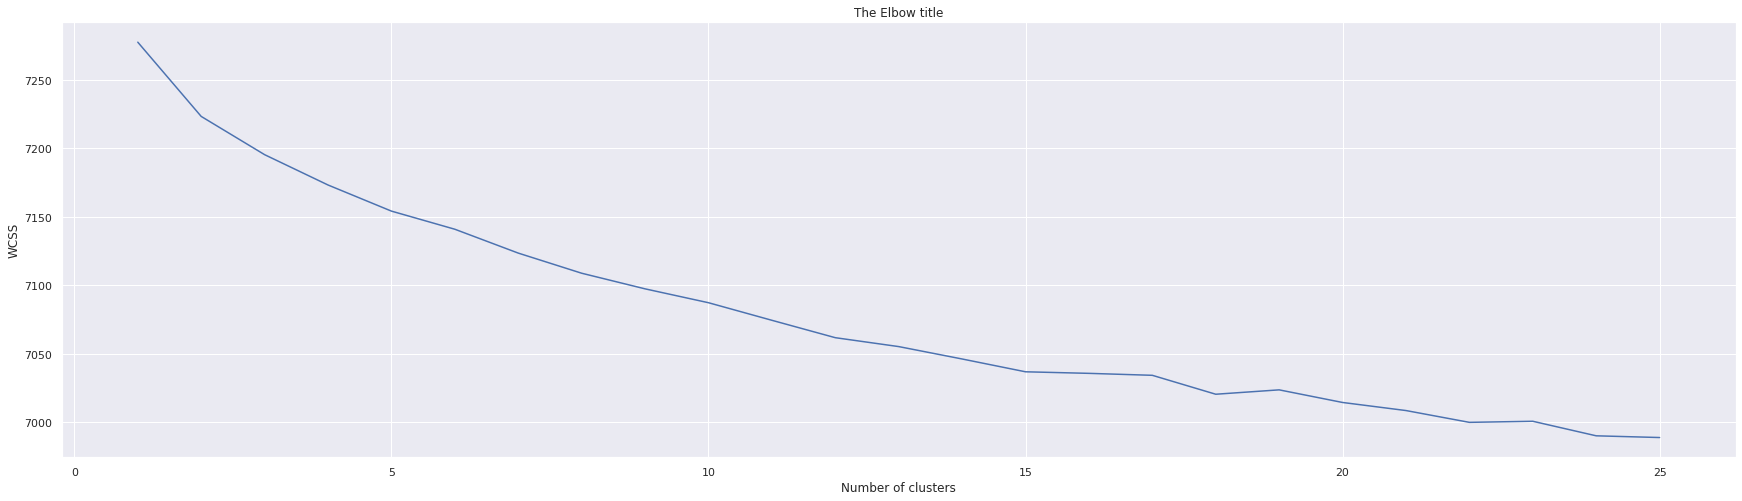

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,26):
  kmeans = KMeans(i)
  kmeans.fit(X_transformed)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,26)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The number of clusters that can be interpreted from the Elbow graph is 18. This number was found by observation a steep bend to the curve or a higher deviation from a straight line and reflect it on the x-axis for the value.

#Silhoutte Score for K-means

For n_clusters = 2 The average silhouette_score is : 0.005021652135202378
For n_clusters = 3 The average silhouette_score is : 0.00560863883293092
For n_clusters = 4 The average silhouette_score is : 0.006721107908286569
For n_clusters = 5 The average silhouette_score is : 0.007660654417616999
For n_clusters = 6 The average silhouette_score is : 0.004395071545644402
For n_clusters = 7 The average silhouette_score is : 0.004901722409621875
For n_clusters = 8 The average silhouette_score is : 0.006011405256657861
For n_clusters = 9 The average silhouette_score is : 0.005251525321690529
For n_clusters = 10 The average silhouette_score is : 0.0056226418093210315
For n_clusters = 11 The average silhouette_score is : 0.006316945561533878
For n_clusters = 12 The average silhouette_score is : 0.006635230005050144
For n_clusters = 13 The average silhouette_score is : 0.007156361152416598
For n_clusters = 14 The average silhouette_score is : 0.007438930240024124
For n_clusters = 15 The average s

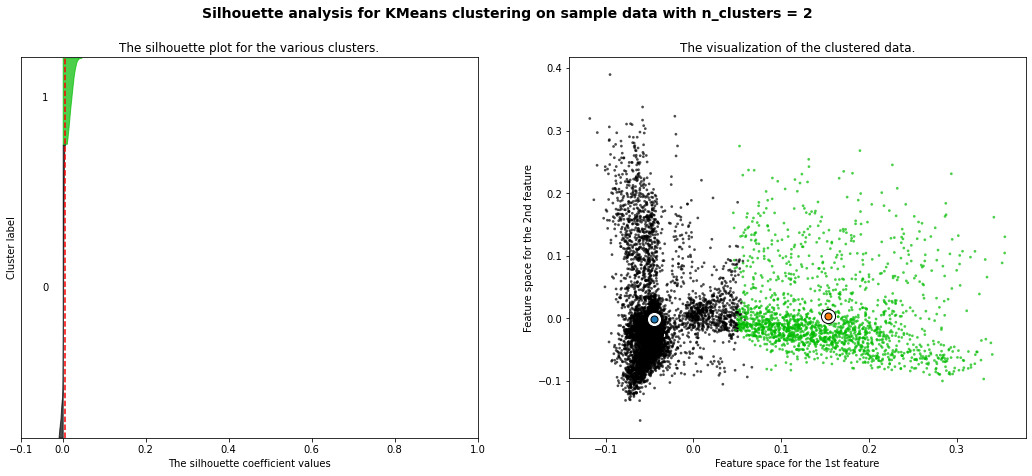

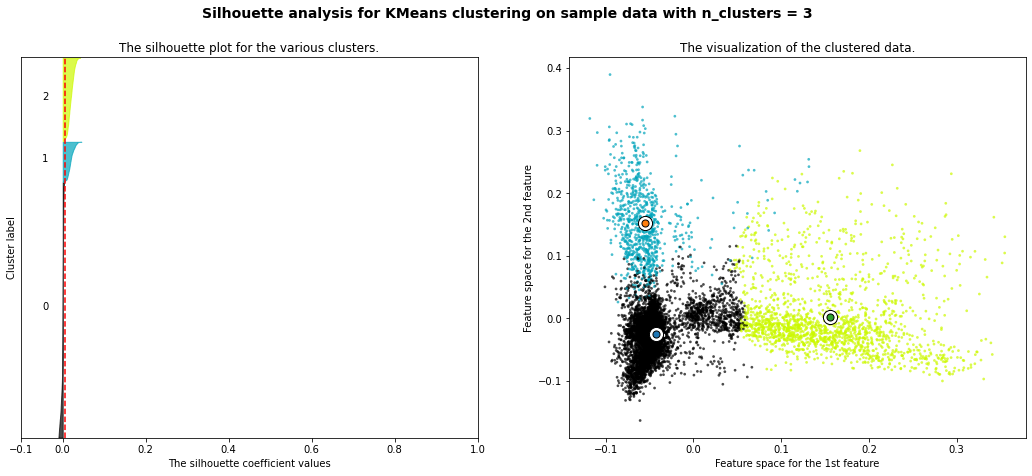

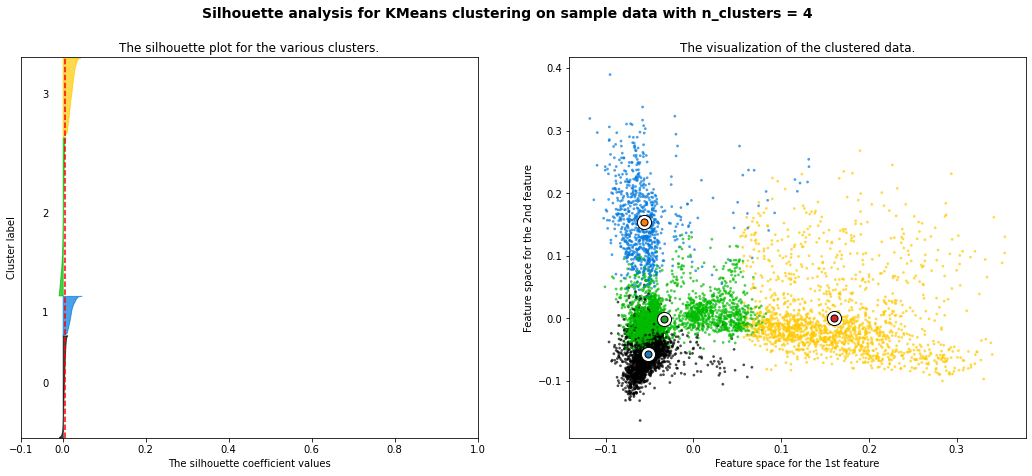

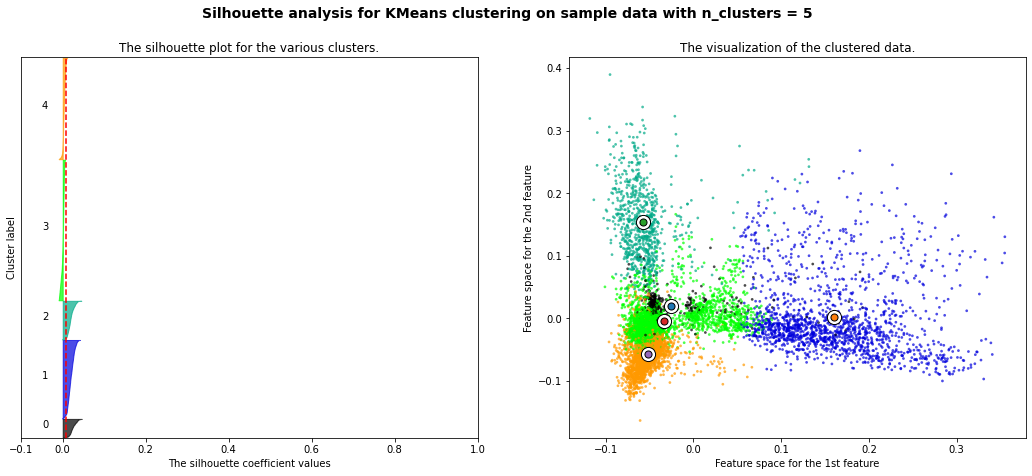

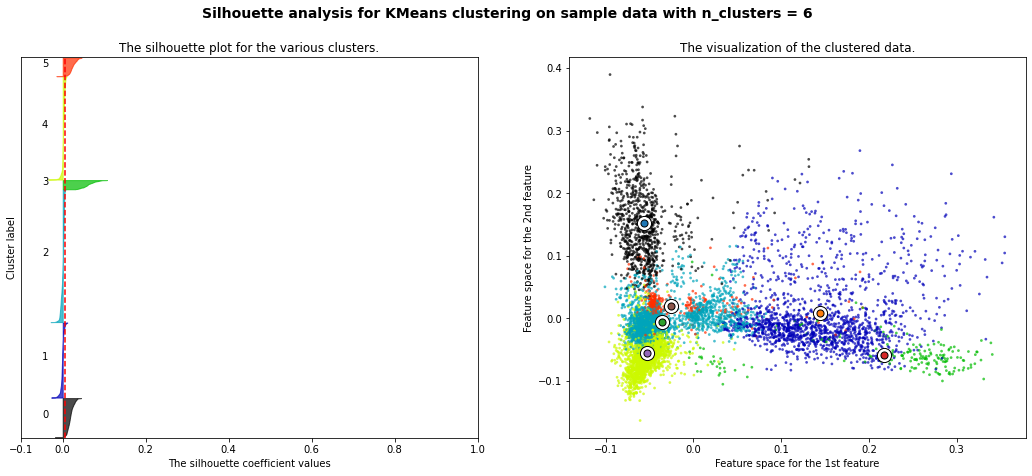

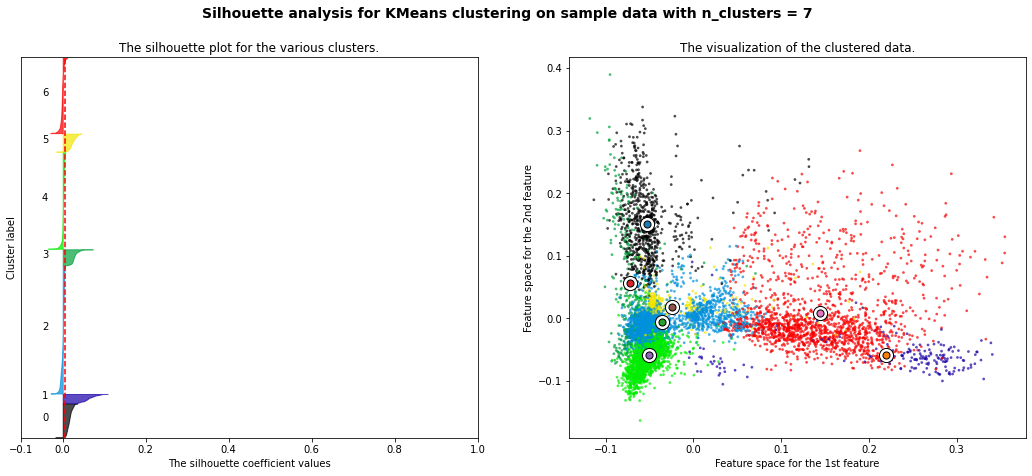

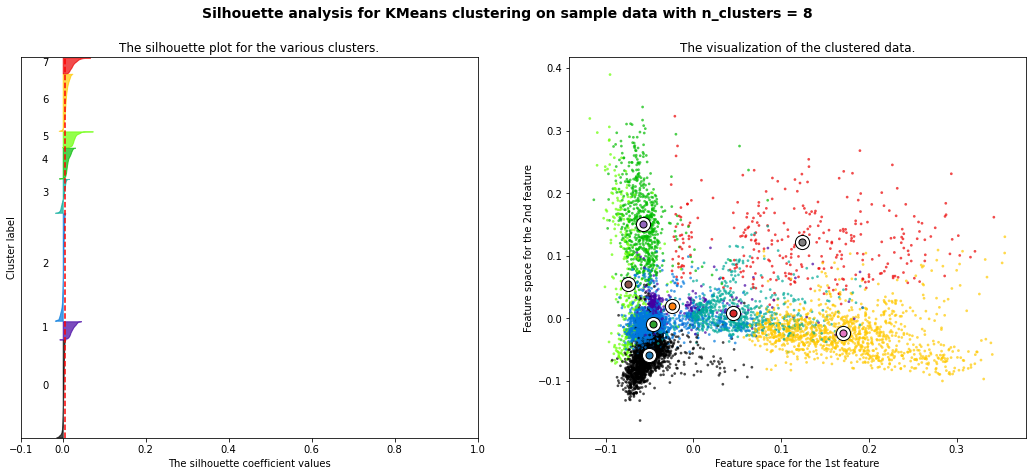

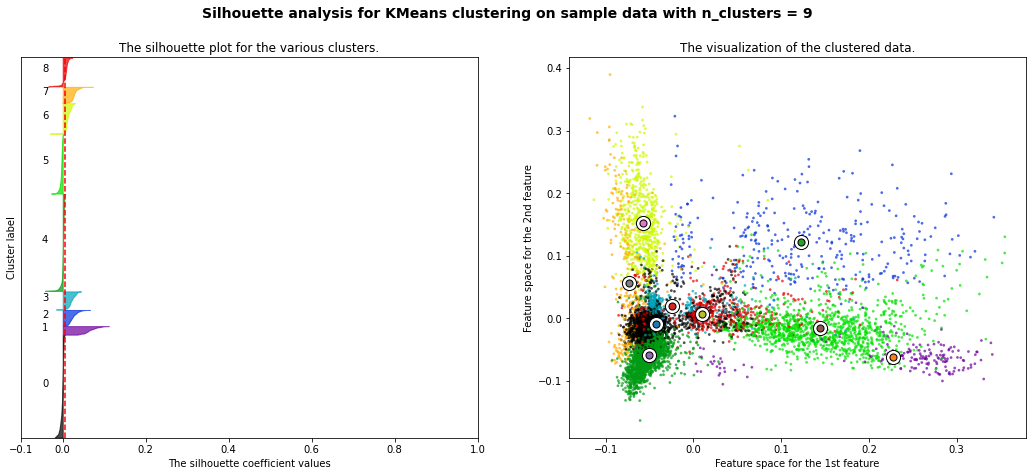

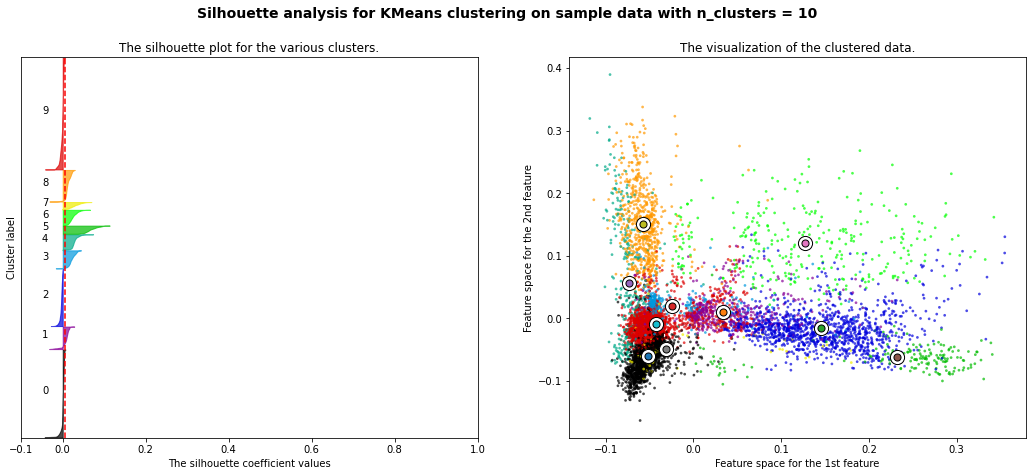

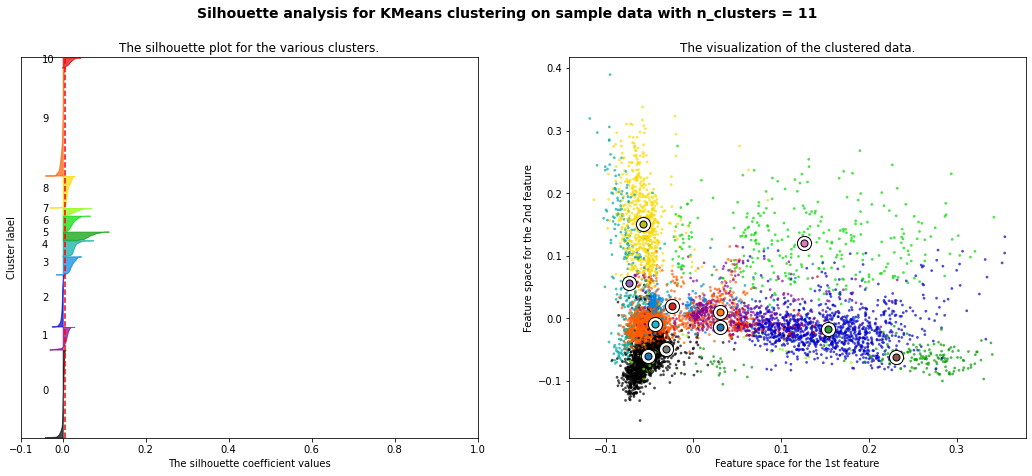

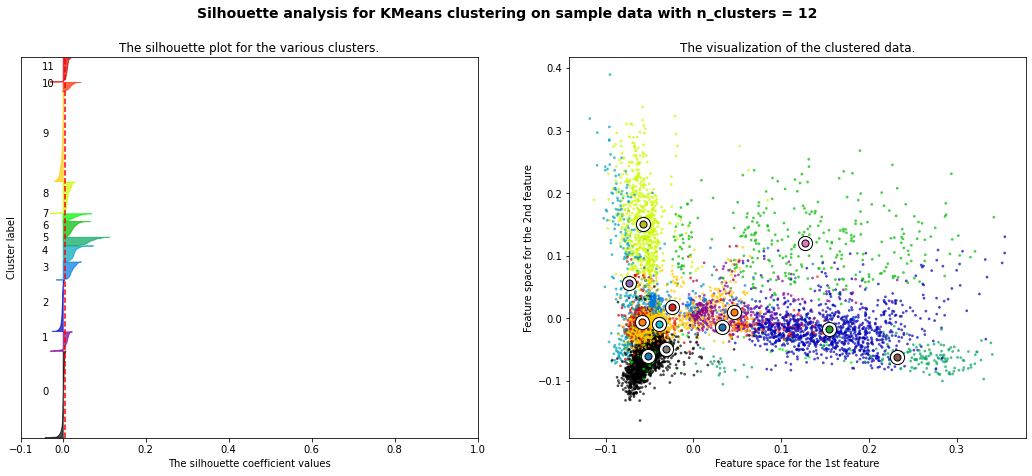

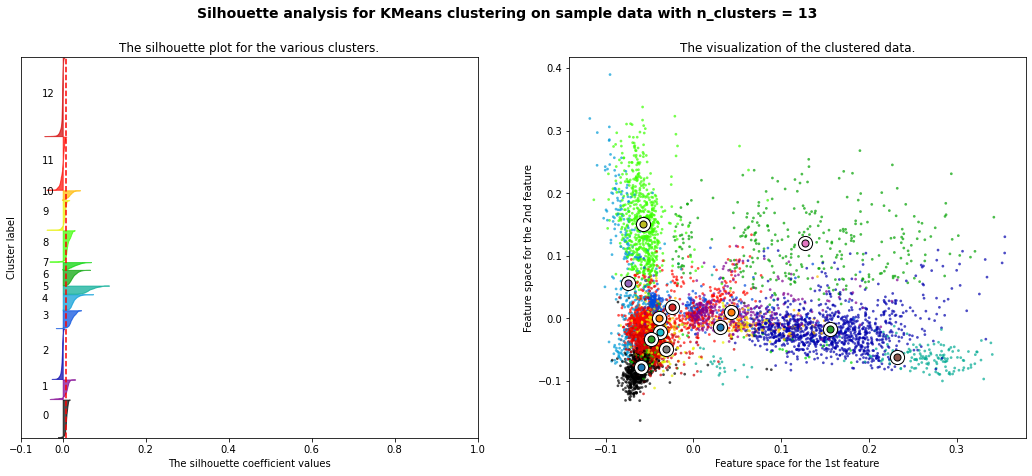

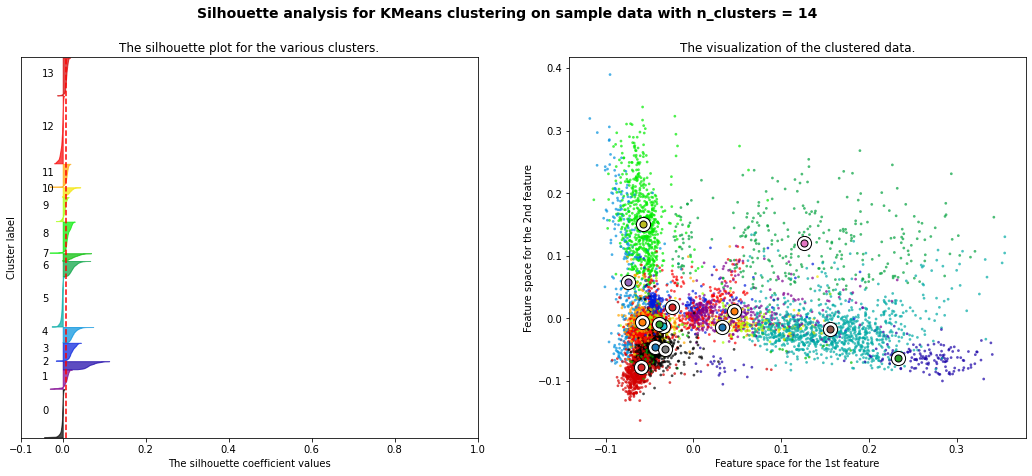

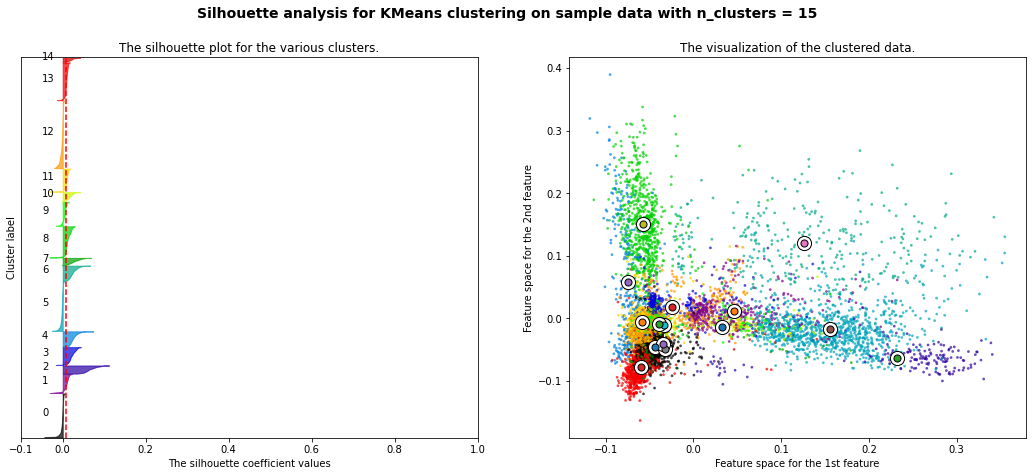

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_transformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The silhouette score was the best for 15 clusters that is 0.0077226308384750935

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

#Dendogram for K-means

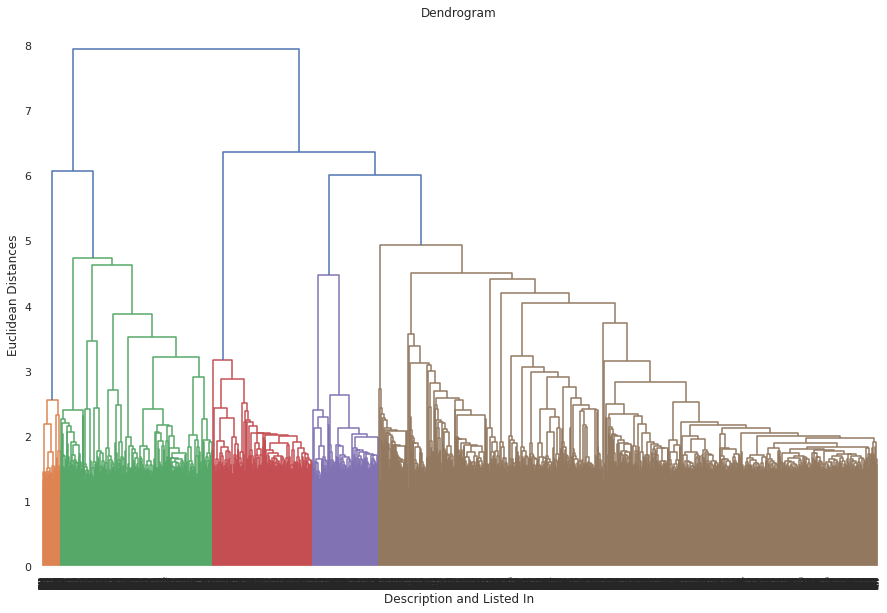

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Description and Listed In')
plt.ylabel('Euclidean Distances')
plt.show() # finding largest vertical distance we can make without crossing any other horizontal line

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We found the largest vertical distance we can make without crossing any other horizontal line and passed down a line through it and found that the number of vertical lines intersected were 15. So the ideal number of clusters for K-means from Dendogram perspective is 15 clusters.

#K-means Clustering with 18 clusters

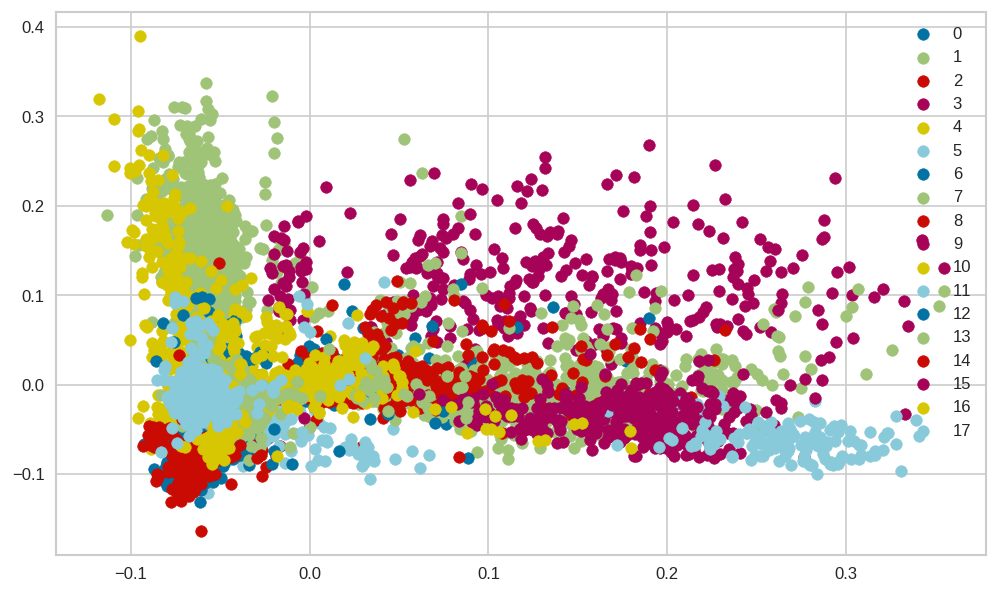

In [ ]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=18, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

#K-means Clustering with 15 clusters.

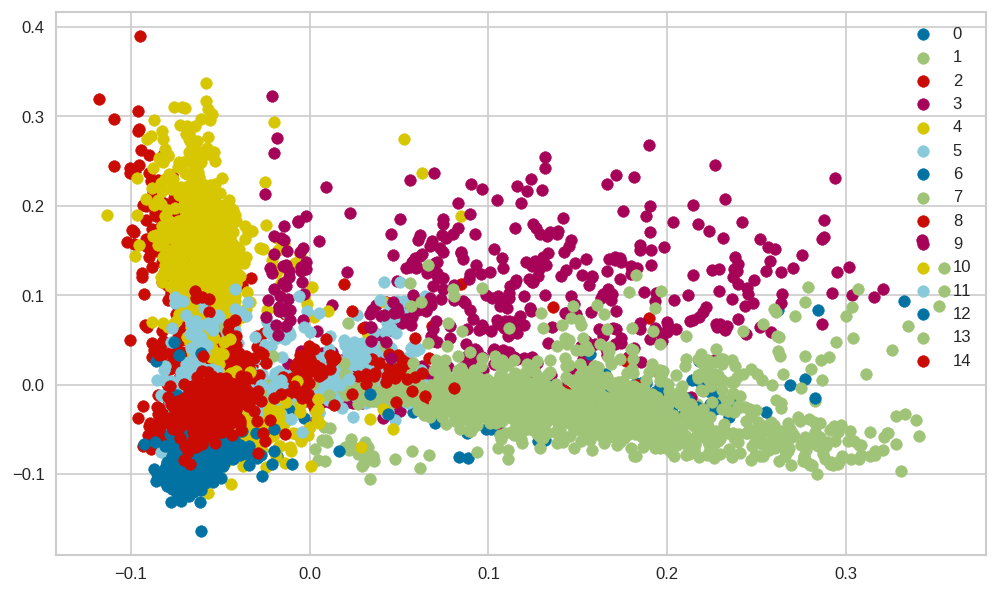

In [ ]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=15, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

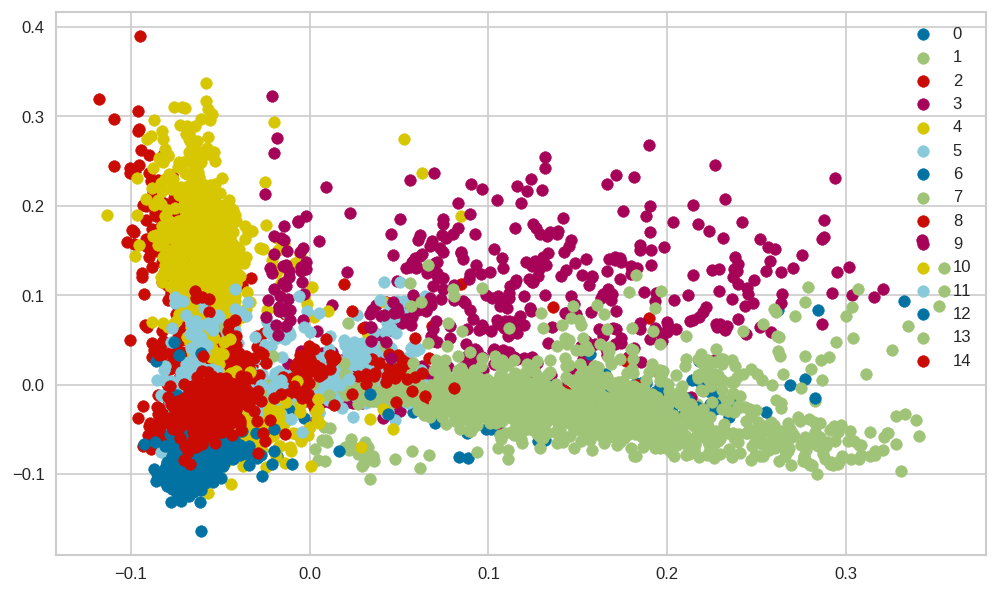

In [ ]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=15, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The number of clusters represent the features coupled based on their similarity factor. The clusters represent data points which contain text based features which will generate content on Netflix. The better the clusters formation,  A better recommendation system can be built.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

K-means is the best model for Clustering

# Hierarchical Clustering:

#Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_transformed)

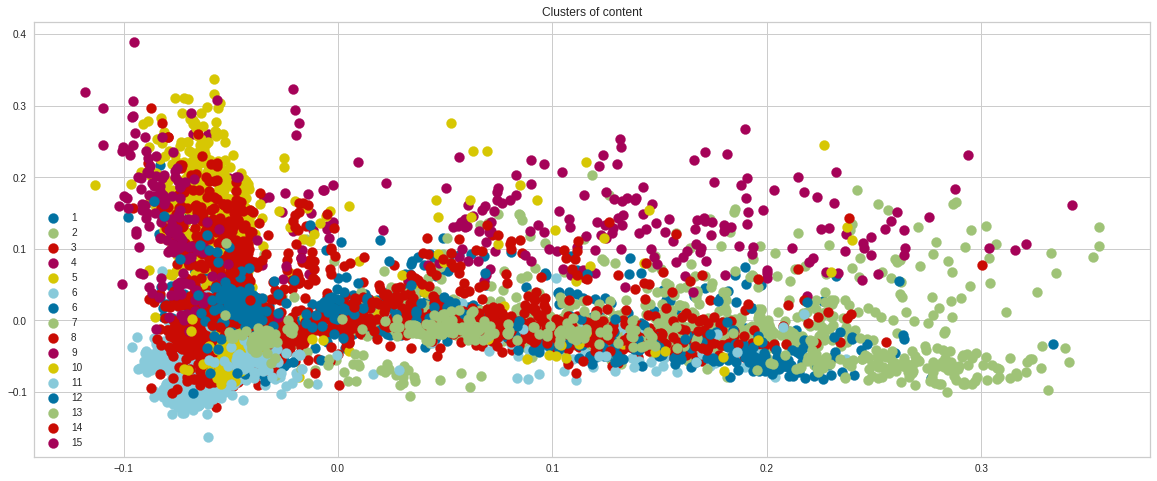

In [ ]:

# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(20,8))
plt.scatter(X_transformed[y_hc == 0, 0], X_transformed[y_hc == 0, 1], s = 100, label = '1')
plt.scatter(X_transformed[y_hc == 1, 0], X_transformed[y_hc == 1, 1], s = 100, label = '2')
plt.scatter(X_transformed[y_hc == 2, 0], X_transformed[y_hc == 2, 1], s = 100, label = '3')
plt.scatter(X_transformed[y_hc == 3, 0], X_transformed[y_hc == 3, 1], s = 100, label = '4')
plt.scatter(X_transformed[y_hc == 4, 0], X_transformed[y_hc == 4, 1], s = 100, label = '5')
plt.scatter(X_transformed[y_hc == 5, 0], X_transformed[y_hc == 5, 1], s = 100, label = '6')
plt.scatter(X_transformed[y_hc == 6, 0], X_transformed[y_hc == 6, 1], s = 100, label = '6')
plt.scatter(X_transformed[y_hc == 7, 0], X_transformed[y_hc == 7, 1], s = 100, label = '7')
plt.scatter(X_transformed[y_hc == 8, 0], X_transformed[y_hc == 8, 1], s = 100, label = '8')
plt.scatter(X_transformed[y_hc == 9, 0], X_transformed[y_hc == 9, 1], s = 100, label = '9')
plt.scatter(X_transformed[y_hc == 10, 0], X_transformed[y_hc == 10, 1], s = 100, label = '10')
plt.scatter(X_transformed[y_hc == 11, 0], X_transformed[y_hc == 11, 1], s = 100, label = '11')
plt.scatter(X_transformed[y_hc == 12, 0], X_transformed[y_hc == 12, 1], s = 100, label = '12')
plt.scatter(X_transformed[y_hc == 13, 0], X_transformed[y_hc == 13, 1], s = 100, label = '13')
plt.scatter(X_transformed[y_hc == 14, 0], X_transformed[y_hc == 14, 1], s = 100, label = '14')
plt.scatter(X_transformed[y_hc == 15, 0], X_transformed[y_hc == 15, 1], s = 100, label = '15')
plt.title('Clusters of content')

plt.legend()
plt.show()     

#Creating a Recommendation System for the above formed Clusters

In [ ]:

# Add cluster values to the dateframe.
data['cluster_number'] = kmeans.labels_

### We preferred the K-means Clustering for the Recommendation System

In [ ]:

#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:

#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = data[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()
     

In [ ]:
data.head()

Filtered_data  length_of_text  \
title                                                                      
3%     futur elit inhabit island paradis far crowd sl...             293   
7:19   devast earthquak hit mexico citi trap survivor...             202   
23:59  armi recruit found dead fellow soldier forc co...             237   
9      postapocalypt world ragdol robot hide fear dan...             277   
21     brilliant group student becom cardcount expert...             267   

       cluster_number  
title                  
3%                 13  
7:19               10  
23:59              14  
9                   5  
21                  5

In [ ]:

for i in range(15):
  func_select_Category(i,'Filtered_data')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Taking out cosine similarity.

cosine_sim = cosine_similarity(X, X)
cosine_sim

array([[1.        , 0.04008581, 0.02536319, ..., 0.00627772, 0.02733029,
        0.004532  ],
       [0.04008581, 1.        , 0.0068876 , ..., 0.06094685, 0.00250036,
        0.0051442 ],
       [0.02536319, 0.0068876 , 1.        , ..., 0.00818895, 0.00233584,
        0.        ],
       ...,
       [0.00627772, 0.06094685, 0.00818895, ..., 1.        , 0.00297278,
        0.24885691],
       [0.02733029, 0.00250036, 0.00233584, ..., 0.00297278, 1.        ,
        0.03065428],
       [0.004532  , 0.0051442 , 0.        , ..., 0.24885691, 0.03065428,
        1.        ]])

In [ ]:
indices = pd.Series(data.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(data.index)[i])
        
    return recommended_movies

In [ ]:
for i in range(0, 500):
  gg = df['title'].iloc[i]
  print(gg)

3%
7:19
23:59
9
21
46
122
187
706
1920
1922
1983
1994
2,215
3022
Oct-01
Feb-09
22-Jul
15-Aug
'89
​​Kuch Bheege Alfaaz
​Goli Soda 2
​Maj Rati ​​Keteki
​Mayurakshi
​SAINT SEIYA: Knights of the Zodiac
(T)ERROR
(Un)Well
#Alive
#AnneFrank - Parallel Stories
#blackAF
#cats_the_mewvie
#FriendButMarried
#FriendButMarried 2
#realityhigh
#Roxy
#Rucker50
#Selfie
#Selfie 69
แผนร้ายนายเจ้าเล่ห์
¡Ay, mi madre!
Çarsi Pazar
Ég man þig
Çok Filim Hareketler Bunlar
Òlòtūré
Æon Flux
Şubat
1 Chance 2 Dance
1 Mile to You
10 Days in Sun City
10 jours en or
10,000 B.C.
100 Days My Prince
100 Days Of Solitude
100 Humans
100 Meters
100 Things to do Before High School
100 Years: One Woman's Fight for Justice
100% Halal
100% Hotter
1000 Rupee Note
12 ROUND GUN
12 Years Promise
13 Cameras
13 Reasons Why
13 Reasons Why: Beyond the Reasons
13 Sins
13TH
13TH: A Conversation with Oprah Winfrey & Ava DuVernay
14 Blades
14 Cameras
14 Minutes from Earth
16 Blocks
17 Again
18 Presents
1898: Our Last Men in the Philippines

In [ ]:

# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('American Psycho'), columns=['Recommendations'])
movie_recommendations
     


Recommendations
0            Shine On with Reese
1                  Love Is Blind
2                     Death Note
3           My Scientology Movie
4  How to Make an American Quilt
5                   The Good Cop
6                         Zodiac
7                       Rain Man
8                   A Family Man
9       Lucas Brothers: On Drugs

In [ ]:

# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('Stranger Things'), columns=['Recommendations'])
tvshows_recommendations.head(11)    

Recommendations
0          Beyond Stranger Things
1                Prank Encounters
2            The Umbrella Academy
3                       Reckoning
4  Sleepless Society: Nyctophobia
5     Anjaan: Special Crimes Unit
6                          The OA
7                   Kiss Me First
8                        The 4400
9                             Eli

# **Conclusion**

1. Majority of the content on Netflix is movies


2. There weren’t any TVShows until 2013 on Netflix


3. The rate of TVShow content has been greater than that of movies and now in the year 2020, there are equal number of movies and TVShows on Netflix


4. Most of the content on Netflix is from United States and 


5. There are a wide range of movies with respect to ratings on Netflix but Highest number of ratings are TV-MA and TV-14 from Movie and TV Show.


6. Netflix has the highest content count for individuals of the age group Millennials and lowest content for Kids.


7. Highest Number of movies and TV shows were produced in the years   2015-2019
December was the month were the most amount of content was added on Netflix followed by October


8. k=15 was found to be an optimal value for the number of clusters using which we grouped our data into 10 distinct clusters.


9. Using the given data a simple recommender system was created using cosine_similarity and recommendations for Movies and Tv Shows were obtained.
